In [141]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 
  
# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 
  
# metadata 
print(drug_consumption_quantified) 

{'data': {'ids':         id
0        1
1        2
2        3
3        4
4        5
...    ...
1880  1884
1881  1885
1882  1886
1883  1887
1884  1888

[1885 rows x 1 columns], 'features':           age   gender  education  country  ethnicity   nscore   escore  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...       ...      ...        ...      ...        ...      ...      ...   
1880 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 

In [142]:
print(X.columns)

Index(['age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss'],
      dtype='object')


In [143]:
print(y.columns)

Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'],
      dtype='object')


In [144]:
import pandas as pd

# Combinar X e y en un único DataFrame
df = pd.concat([X, y], axis=1)

# Verifica las primeras filas del DataFrame combinado
print(df.head())

       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  ...  ecstasy  heroin ketamine legalh  lsd meth mushrooms  \
0 -0.91699 -0.00665  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL0   
1  0.76096 -0.14277  ...      CL4     CL0      CL2    CL0  CL2  CL3       CL0   
2 -1.62090 -1.01450  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL1   
3  0.59042  0.58489  ...      CL0     CL0      CL2    CL0  CL0  CL0       CL0   
4 -0.30172  1.30612  ...      CL1     CL0      CL0    CL1  CL0  CL0       CL2   

  nicotine semer  vsa  
0 

In [145]:
# Mapeo de los códigos a las categorías de recencia
category_mapping = {
    "CL0": 365 * 10,  # Tiempo estimado de 10 años en el futuro para no consumidores
    "CL1": -3650,     # Hace más de 10 años (~365 días * 10)
    "CL2": -1825,     # En la última década (~365 días * 5)
    "CL3": -365,      # En el último año
    "CL4": -30,       # En el último mes
    "CL5": -7,        # En la última semana
    "CL6": -1,        # En el último día
}

# Aplica el mapeo a las columnas de `y`
for column in y.columns:
    df[column] = df[column].map(category_mapping)

# Verifica las primeras filas después de la transformación
print(df[y.columns].head())

   alcohol  amphet  amyl  benzos  caff  cannabis  choc  coke  crack  ecstasy  \
0       -7   -1825  3650   -1825    -1      3650    -7  3650   3650     3650   
1       -7   -1825 -1825    3650    -1       -30    -1  -365   3650      -30   
2       -1    3650  3650    3650    -1      -365   -30  3650   3650     3650   
3      -30    3650  3650    -365    -7     -1825   -30 -1825   3650     3650   
4      -30   -3650 -3650    3650    -1      -365    -1  3650   3650    -3650   

   heroin  ketamine  legalh   lsd  meth  mushrooms  nicotine  semer   vsa  
0    3650      3650    3650  3650  3650       3650     -1825   3650  3650  
1    3650     -1825    3650 -1825  -365       3650       -30   3650  3650  
2    3650      3650    3650  3650  3650      -3650      3650   3650  3650  
3    3650     -1825    3650  3650  3650       3650     -1825   3650  3650  
4    3650      3650   -3650  3650  3650      -1825     -1825   3650  3650  


In [146]:
# Revisa las dimensiones del DataFrame
print(df.shape)

# Muestra estadísticas descriptivas de las columnas de consumo
print(df[y.columns].describe())

(1885, 31)
           alcohol       amphet         amyl       benzos         caff  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean   -111.829178  1169.430239  1872.585676  1437.202653    -5.371883   
std     776.346744  2757.431771  2762.284543  2501.089471   555.285722   
min   -3650.000000 -3650.000000 -3650.000000 -3650.000000 -3650.000000   
25%     -30.000000 -1825.000000  -365.000000  -365.000000    -7.000000   
50%      -7.000000  3650.000000  3650.000000  3650.000000    -1.000000   
75%      -1.000000  3650.000000  3650.000000  3650.000000    -1.000000   
max    3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   

          cannabis         choc         coke        crack      ecstasy  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     97.335279    28.340584  1387.004775  2900.652520  1475.280106   
std    2204.546001   518.026717  2653.739640  1939.809375  2504.933265   
min   -3650.000000 -3650.0

In [147]:
#!pip install lifelines


In [148]:
# Función para ajustar el modelo de Cox para cada droga
def ajustar_modelo_cox(df, droga):
    # Asegúrate de que las categorías están mapeadas correctamente
    if df[droga].dtype == object:  # Si los valores son cadenas
        df['time'] = df[droga].map(category_mapping)
    else:
        df['time'] = df[droga]

    # Reemplaza valores de tiempo faltantes o iguales a 0 con un valor pequeño positivo
    df['time'] = df['time'].fillna(1e-5)  # Rellena nulos con un valor pequeño
    df['time'] = df['time'].apply(lambda x: x if x != 0 else 1e-5)  # Asegura que no haya ceros

    # Crear la columna 'event_column' para identificar si el consumo ya ocurrió
    df['event_column'] = (df[droga] != "CL0").astype(int)  # Evento si no es "CL0"

    # Prepara el DataFrame para la droga específica con las variables relevantes
    df_droga = df[[ 
        "age", "gender", "education", "country", "ethnicity", 
        "nscore", "escore", "oscore", "ascore", "cscore", 
        "ss", "alcohol", "amphet", "amyl", "benzos", "caff", 
        "cannabis", "choc", "coke", "crack", "legalh", "lsd", 
        "meth", "mushrooms", "nicotine", "semer", "time", "event_column"
    ]]

    # Ajustar el modelo de Cox con regularización Lasso (penalización L1)
    cph = CoxPHFitter(penalizer=0.1)  # Ajusta el valor de penalización según sea necesario
    cph.fit(df_droga, duration_col='time', event_col='event_column', show_progress=True)
    
    # Mostrar el resumen del modelo
    print(f"Modelo para {droga}:")
    cph.print_summary()
    print("\n" + "-"*50 + "\n")

# Itera sobre todas las columnas de drogas y ajusta el modelo
for droga in [
    "alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", 
    "choc", "coke", "crack", "legalh", "lsd", "meth", "mushrooms", 
    "nicotine", "semer"
]:
    ajustar_modelo_cox(df, droga)

 

Iteration 1: norm_delta = 5.08e-01, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 2.63e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 5.26e-01, step_size = 0.9500, log_lik = -12017.45337, newton_decrement = 1.19e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.56e-01, step_size = 0.9500, log_lik = -11872.28036, newton_decrement = 2.91e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 5.91e-02, step_size = 0.9310, log_lik = -11841.95930, newton_decrement = 6.81e-01, seconds_since_start = 0.0
Iteration 5: norm_delta = 8.74e-04, step_size = 1.0000, log_lik = -11841.27147, newton_decrement = 1.42e-04, seconds_since_start = 0.0
Iteration 6: norm_delta = 1.89e-07, step_size = 1.0000, log_lik = -11841.27133, newton_decrement = 6.66e-12, seconds_since_start = 0.0
Convergence success after 6 iterations.
Modelo para alcohol:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11841.27
         time fit was run = 2024-12-07 23:40:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.06      0.94      0.03           -0.12           -0.00                0.88                1.00
gender     0.12      1.12      0.05            0.02            0.22                1.02                1.24
education -0.10      0.90      0.02           -0.15           -0.05                0.86                0.95
country   -0.06      0.94      0.04           -0.14            0.02                0.87                1.02
ethnicity  0.13      1.14      0.15           -0.16            0.42                0.85                1.52
nscore    -0.05      0.95      0.03           -0.11           -0.00                0.90                1.00
escore    -0.03      0.97      0.03           -0.08            0.02                0.92                1.02
oscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
ascore     0.03      1.03      0.02           -0.02            0.07                0.98                1.08
cscore    -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
ss        -0.08      0.92      0.03           -0.14           -0.03                0.87                0.97
alcohol   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
amphet     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00  -2.11   0.03      4.85
gender       0.00   2.31   0.02      5.56
education    0.00  -4.14 <0.005     14.82
country      0.00  -1.59   0.11      3.16
ethnicity    0.00   0.88   0.38      1.41
nscore       0.00  -2.06   0.04      4.66
escore       0.00  -1.04   0.30      1.74
oscore       0.00  -0.39   0.70      0.51
ascore       0.00   1.12   0.26      1.93
cscore       0.00  -0.03   0.98      0.03
ss           0.00  -2.96 <0.005      8.3


--------------------------------------------------

Iteration 1: norm_delta = 1.96e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.36e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.87e-01, step_size = 0.9500, log_lik = -11067.06350, newton_decrement = 1.71e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.35e-02, step_size = 0.9500, log_lik = -11049.99611, newton_decrement = 5.78e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.70e-05, step_size = 1.0000, log_lik = -11049.93827, newton_decrement = 1.98e-07, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.48e-10, step_size = 1.0000, log_lik = -11049.93827, newton_decrement = 6.19e-18, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para amphet:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11049.94
         time fit was run = 2024-12-07 23:40:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.00      1.00      0.03           -0.05            0.06                0.95                1.06
gender    -0.02      0.98      0.05           -0.12            0.07                0.88                1.08
education -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
country    0.09      1.10      0.04            0.01            0.17                1.01                1.19
ethnicity -0.05      0.95      0.13           -0.31            0.21                0.74                1.24
nscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.05
escore    -0.01      0.99      0.03           -0.06            0.05                0.94                1.05
oscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
ascore     0.01      1.01      0.02           -0.03            0.06                0.97                1.06
cscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.07
ss         0.01      1.01      0.03           -0.05            0.06                0.95                1.06
alcohol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   0.17   0.87      0.20
gender       0.00  -0.50   0.62      0.69
education    0.00  -0.53   0.60      0.75
country      0.00   2.23   0.03      5.28
ethnicity    0.00  -0.35   0.72      0.47
nscore       0.00  -0.23   0.82      0.29
escore       0.00  -0.23   0.82      0.28
oscore       0.00   0.46   0.65      0.63
ascore       0.00   0.55   0.58      0.78
cscore       0.00   0.55   0.58      0.78
ss           0.00   0.22   0.82      0.2


--------------------------------------------------

Iteration 1: norm_delta = 2.18e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.18e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.80e-01, step_size = 0.9500, log_lik = -11394.14626, newton_decrement = 1.77e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.71e-03, step_size = 0.9500, log_lik = -11377.10294, newton_decrement = 6.32e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.06e-06, step_size = 1.0000, log_lik = -11377.09662, newton_decrement = 2.39e-09, seconds_since_start = 0.0
Convergence success after 4 iterations.
Modelo para amyl:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11377.10
         time fit was run = 2024-12-07 23:40:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.02      1.02      0.03           -0.04            0.08                0.96                1.08
gender    -0.03      0.97      0.05           -0.12            0.07                0.88                1.08
education  0.01      1.01      0.03           -0.04            0.06                0.96                1.06
country    0.12      1.12      0.04            0.04            0.20                1.04                1.22
ethnicity  0.00      1.00      0.13           -0.26            0.26                0.77                1.30
nscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.06
escore     0.01      1.02      0.03           -0.04            0.07                0.96                1.07
oscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
ascore     0.00      1.00      0.02           -0.04            0.05                0.96                1.05
cscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
ss         0.01      1.01      0.03           -0.05            0.06                0.95                1.06
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   0.58   0.56      0.83
gender       0.00  -0.52   0.61      0.72
education    0.00   0.43   0.67      0.58
country      0.00   2.84 <0.005      7.79
ethnicity    0.00   0.01   0.99      0.01
nscore       0.00   0.09   0.93      0.11
escore       0.00   0.56   0.57      0.80
oscore       0.00  -0.45   0.65      0.62
ascore       0.00   0.07   0.94      0.08
cscore       0.00  -0.50   0.62      0.69
ss           0.00   0.20   0.84      0.2


--------------------------------------------------

Iteration 1: norm_delta = 2.00e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.28e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.27e-01, step_size = 0.9500, log_lik = -11124.62418, newton_decrement = 5.65e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.95e-03, step_size = 0.9500, log_lik = -11118.91356, newton_decrement = 3.22e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 5.07e-05, step_size = 1.0000, log_lik = -11118.88122, newton_decrement = 2.20e-06, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.55e-08, step_size = 1.0000, log_lik = -11118.88121, newton_decrement = 2.36e-13, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para benzos:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11118.88
         time fit was run = 2024-12-07 23:40:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.04      1.04      0.03           -0.02            0.10                0.98                1.10
gender    -0.01      0.99      0.05           -0.11            0.09                0.90                1.09
education  0.01      1.01      0.03           -0.04            0.06                0.97                1.06
country    0.02      1.02      0.04           -0.06            0.10                0.94                1.11
ethnicity -0.03      0.97      0.13           -0.29            0.23                0.75                1.26
nscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
escore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
oscore     0.02      1.02      0.03           -0.03            0.07                0.97                1.07
ascore     0.01      1.01      0.02           -0.04            0.05                0.96                1.05
cscore    -0.02      0.98      0.03           -0.07            0.03                0.93                1.03
ss        -0.01      0.99      0.03           -0.07            0.05                0.94                1.05
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
caff       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   1.25   0.21      2.23
gender       0.00  -0.20   0.84      0.25
education    0.00   0.54   0.59      0.77
country      0.00   0.56   0.58      0.79
ethnicity    0.00  -0.21   0.84      0.26
nscore       0.00  -0.51   0.61      0.71
escore       0.00   0.34   0.73      0.45
oscore       0.00   0.71   0.47      1.07
ascore       0.00   0.27   0.79      0.35
cscore       0.00  -0.77   0.44      1.18
ss           0.00  -0.34   0.74      0.4


--------------------------------------------------

Iteration 1: norm_delta = 2.55e-01, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.19e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.54e-01, step_size = 0.9500, log_lik = -12190.91426, newton_decrement = 4.78e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.66e-01, step_size = 0.9500, log_lik = -12131.47985, newton_decrement = 2.03e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.27e-01, step_size = 0.9310, log_lik = -12108.07284, newton_decrement = 2.89e+00, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.60e-02, step_size = 0.9124, log_lik = -12105.15082, newton_decrement = 4.33e-02, seconds_since_start = 0.0
Iteration 6: norm_delta = 4.46e-05, step_size = 1.0000, log_lik = -12105.10741, newton_decrement = 3.51e-07, seconds_since_start = 0.0
Iteration 7: norm_delta = 3.53e-10, step_size = 1.0000, log_lik = -12105.10741, newton_decrement = 2.21e-17, seconds_since_start = 0.0
Co

<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -12105.11
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.08      0.93      0.03           -0.14           -0.02                0.87                0.98
gender     0.03      1.03      0.05           -0.07            0.12                0.93                1.13
education -0.01      0.99      0.02           -0.06            0.04                0.94                1.04
country   -0.03      0.97      0.04           -0.11            0.05                0.90                1.05
ethnicity -0.04      0.96      0.15           -0.33            0.25                0.72                1.28
nscore    -0.03      0.98      0.03           -0.08            0.03                0.93                1.03
escore    -0.02      0.98      0.03           -0.07            0.04                0.93                1.04
oscore     0.01      1.01      0.03           -0.04            0.07                0.96                1.07
ascore    -0.00      1.00      0.02           -0.05            0.04                0.95                1.05
cscore    -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
ss        -0.01      0.99      0.03           -0.06            0.05                0.94                1.05
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
cannabis   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00  -2.55   0.01      6.55
gender       0.00   0.52   0.61      0.72
education    0.00  -0.34   0.73      0.45
country      0.00  -0.68   0.50      1.00
ethnicity    0.00  -0.27   0.78      0.35
nscore       0.00  -0.97   0.33      1.59
escore       0.00  -0.61   0.54      0.89
oscore       0.00   0.53   0.60      0.74
ascore       0.00  -0.10   0.92      0.12
cscore       0.00  -0.17   0.86      0.21
ss           0.00  -0.30   0.76      0.3


--------------------------------------------------

Iteration 1: norm_delta = 1.89e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.28e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.91e-01, step_size = 0.9500, log_lik = -11079.97405, newton_decrement = 1.12e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.05e-01, step_size = 0.9500, log_lik = -10961.11906, newton_decrement = 4.63e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 5.65e-03, step_size = 1.0000, log_lik = -10956.34614, newton_decrement = 1.17e-02, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.45e-05, step_size = 1.0000, log_lik = -10956.33445, newton_decrement = 7.63e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para cannabis:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -10956.33
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.06      1.06      0.03           -0.00            0.12                1.00                1.12
gender     0.05      1.05      0.05           -0.05            0.15                0.95                1.16
education  0.09      1.10      0.02            0.04            0.14                1.04                1.15
country    0.13      1.14      0.04            0.05            0.21                1.05                1.24
ethnicity -0.04      0.96      0.13           -0.30            0.21                0.74                1.23
nscore     0.03      1.03      0.03           -0.03            0.08                0.97                1.08
escore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
oscore    -0.05      0.95      0.03           -0.11           -0.00                0.90                1.00
ascore     0.01      1.01      0.02           -0.04            0.05                0.96                1.06
cscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
ss        -0.01      0.99      0.03           -0.07            0.04                0.93                1.04
alcohol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
choc       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh     0.00      1.00      0.00            0.00            0.00                1.00                1.00
lsd        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   1.81   0.07      3.84
gender       0.00   1.03   0.30      1.73
education    0.00   3.67 <0.005     12.01
country      0.00   3.21 <0.005      9.54
ethnicity    0.00  -0.33   0.74      0.43
nscore       0.00   0.96   0.34      1.58
escore       0.00  -0.45   0.65      0.62
oscore       0.00  -1.99   0.05      4.43
ascore       0.00   0.31   0.76      0.40
cscore       0.00   0.13   0.90      0.15
ss           0.00  -0.46   0.64      0.6


--------------------------------------------------

Iteration 1: norm_delta = 2.40e-01, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.22e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.93e-01, step_size = 0.9500, log_lik = -12191.61705, newton_decrement = 3.76e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.71e-01, step_size = 0.9500, log_lik = -12145.89073, newton_decrement = 1.23e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 9.40e-02, step_size = 1.0000, log_lik = -12131.03474, newton_decrement = 1.93e+00, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.51e-02, step_size = 1.0000, log_lik = -12128.94178, newton_decrement = 3.84e-02, seconds_since_start = 0.0
Iteration 6: norm_delta = 2.52e-04, step_size = 1.0000, log_lik = -12128.90298, newton_decrement = 1.04e-05, seconds_since_start = 0.0
Iteration 7: norm_delta = 6.61e-08, step_size = 1.0000, log_lik = -12128.90297, newton_decrement = 7.16e-13, seconds_since_start = 0.0
Co

<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -12128.90
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.05      0.95      0.03           -0.11            0.00                0.89                1.00
gender    -0.06      0.94      0.05           -0.16            0.04                0.85                1.04
education -0.02      0.98      0.02           -0.07            0.03                0.93                1.03
country   -0.04      0.96      0.04           -0.12            0.04                0.89                1.04
ethnicity -0.06      0.94      0.12           -0.30            0.19                0.74                1.20
nscore    -0.05      0.95      0.03           -0.10            0.01                0.91                1.01
escore    -0.02      0.98      0.03           -0.07            0.03                0.93                1.03
oscore    -0.01      0.99      0.03           -0.07            0.04                0.94                1.04
ascore    -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
cscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
ss        -0.02      0.98      0.03           -0.07            0.04                0.93                1.04
alcohol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00  -1.84   0.07      3.92
gender       0.00  -1.17   0.24      2.05
education    0.00  -0.87   0.38      1.38
country      0.00  -1.03   0.30      1.71
ethnicity    0.00  -0.47   0.64      0.65
nscore       0.00  -1.77   0.08      3.69
escore       0.00  -0.76   0.44      1.17
oscore       0.00  -0.52   0.60      0.73
ascore       0.00  -0.34   0.73      0.45
cscore       0.00   0.35   0.73      0.46
ss           0.00  -0.60   0.55      0.8


--------------------------------------------------

Iteration 1: norm_delta = 1.95e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.33e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.78e-01, step_size = 0.9500, log_lik = -11118.08795, newton_decrement = 1.56e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.04e-02, step_size = 0.9500, log_lik = -11102.46372, newton_decrement = 6.81e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.42e-05, step_size = 1.0000, log_lik = -11102.39552, newton_decrement = 1.03e-06, seconds_since_start = 0.0
Iteration 5: norm_delta = 7.49e-10, step_size = 1.0000, log_lik = -11102.39552, newton_decrement = 4.62e-16, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para coke:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11102.40
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.05      1.05      0.03           -0.01            0.11                0.99                1.12
gender     0.03      1.03      0.05           -0.07            0.13                0.93                1.13
education  0.00      1.00      0.02           -0.04            0.05                0.96                1.05
country   -0.05      0.95      0.04           -0.13            0.03                0.88                1.03
ethnicity -0.07      0.94      0.14           -0.33            0.20                0.72                1.22
nscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
escore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
oscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.07
ascore     0.00      1.00      0.02           -0.04            0.05                0.96                1.05
cscore    -0.02      0.98      0.03           -0.07            0.03                0.94                1.03
ss        -0.03      0.97      0.03           -0.09            0.03                0.92                1.03
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
meth       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   1.76   0.08      3.69
gender       0.00   0.56   0.58      0.79
education    0.00   0.16   0.88      0.19
country      0.00  -1.17   0.24      2.05
ethnicity    0.00  -0.49   0.63      0.67
nscore       0.00  -0.31   0.75      0.41
escore       0.00  -0.37   0.71      0.50
oscore       0.00   0.49   0.63      0.68
ascore       0.00   0.20   0.84      0.26
cscore       0.00  -0.62   0.54      0.90
ss           0.00  -1.06   0.29      1.7


--------------------------------------------------

Iteration 1: norm_delta = 2.29e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 8.08e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 8.73e-01, step_size = 0.9500, log_lik = -11898.07294, newton_decrement = 1.27e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.03e-01, step_size = 0.9500, log_lik = -11788.98891, newton_decrement = 2.65e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.71e-03, step_size = 1.0000, log_lik = -11786.29686, newton_decrement = 1.78e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.96e-06, step_size = 1.0000, log_lik = -11786.29509, newton_decrement = 9.21e-10, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para crack:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11786.30
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.02      1.02      0.03           -0.04            0.08                0.96                1.08
gender     0.01      1.01      0.05           -0.09            0.11                0.92                1.12
education -0.00      1.00      0.02           -0.05            0.04                0.95                1.05
country   -0.02      0.98      0.04           -0.10            0.06                0.91                1.06
ethnicity  0.00      1.00      0.13           -0.26            0.27                0.77                1.31
nscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
escore    -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
oscore    -0.00      1.00      0.03           -0.06            0.05                0.95                1.05
ascore     0.00      1.00      0.02           -0.04            0.05                0.96                1.05
cscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
ss         0.01      1.01      0.03           -0.05            0.06                0.95                1.07
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   0.56   0.57      0.81
gender       0.00   0.25   0.81      0.31
education    0.00  -0.18   0.86      0.22
country      0.00  -0.43   0.67      0.58
ethnicity    0.00   0.03   0.97      0.04
nscore       0.00   0.07   0.94      0.09
escore       0.00  -0.01   0.99      0.02
oscore       0.00  -0.18   0.86      0.22
ascore       0.00   0.15   0.88      0.18
cscore       0.00   0.07   0.95      0.08
ss           0.00   0.29   0.77      0.3


--------------------------------------------------

Iteration 1: norm_delta = 1.94e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.20e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.10e-02, step_size = 0.9500, log_lik = -11241.43463, newton_decrement = 1.25e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.70e-03, step_size = 0.9500, log_lik = -11240.17641, newton_decrement = 4.61e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.17e-06, step_size = 1.0000, log_lik = -11240.17180, newton_decrement = 1.33e-08, seconds_since_start = 0.0
Convergence success after 4 iterations.
Modelo para legalh:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11240.17
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.06      0.94      0.03           -0.12            0.00                0.89                1.00
gender    -0.03      0.97      0.05           -0.13            0.07                0.88                1.07
education  0.00      1.00      0.03           -0.04            0.05                0.96                1.06
country   -0.01      0.99      0.04           -0.09            0.07                0.92                1.08
ethnicity -0.05      0.95      0.13           -0.31            0.21                0.73                1.23
nscore    -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
escore    -0.01      0.99      0.03           -0.06            0.05                0.94                1.05
oscore     0.03      1.03      0.03           -0.03            0.08                0.97                1.08
ascore     0.02      1.02      0.02           -0.02            0.07                0.98                1.07
cscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
ss         0.02      1.02      0.03           -0.03            0.08                0.97                1.08
alcohol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00  -1.95   0.05      4.29
gender       0.00  -0.67   0.51      0.99
education    0.00   0.18   0.86      0.22
country      0.00  -0.16   0.88      0.19
ethnicity    0.00  -0.41   0.68      0.55
nscore       0.00  -0.07   0.94      0.08
escore       0.00  -0.24   0.81      0.30
oscore       0.00   0.97   0.33      1.59
ascore       0.00   0.92   0.36      1.49
cscore       0.00   0.23   0.82      0.29
ss           0.00   0.79   0.43      1.2


--------------------------------------------------

Iteration 1: norm_delta = 2.04e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.36e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.10e-01, step_size = 0.9500, log_lik = -11124.11322, newton_decrement = 1.29e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 8.35e-03, step_size = 0.9500, log_lik = -11111.13402, newton_decrement = 6.38e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.11e-05, step_size = 1.0000, log_lik = -11111.06999, newton_decrement = 1.62e-06, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.30e-09, step_size = 1.0000, log_lik = -11111.06999, newton_decrement = 1.58e-15, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para lsd:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11111.07
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.08      1.09      0.03            0.02            0.14                1.02                1.15
gender     0.00      1.00      0.05           -0.10            0.10                0.91                1.11
education -0.00      1.00      0.02           -0.05            0.05                0.95                1.05
country   -0.05      0.95      0.04           -0.13            0.03                0.88                1.03
ethnicity  0.03      1.03      0.14           -0.24            0.30                0.79                1.35
nscore    -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
escore    -0.03      0.97      0.03           -0.08            0.02                0.92                1.02
oscore     0.00      1.00      0.03           -0.05            0.06                0.95                1.06
ascore    -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
cscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
ss         0.02      1.02      0.03           -0.04            0.07                0.96                1.08
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
nicotine   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   2.72   0.01      7.25
gender       0.00   0.05   0.96      0.06
education    0.00  -0.07   0.95      0.08
country      0.00  -1.13   0.26      1.96
ethnicity    0.00   0.20   0.84      0.26
nscore       0.00  -0.13   0.90      0.16
escore       0.00  -1.04   0.30      1.75
oscore       0.00   0.15   0.88      0.19
ascore       0.00  -0.23   0.82      0.28
cscore       0.00   0.33   0.74      0.44
ss           0.00   0.62   0.53      0.9


--------------------------------------------------

Iteration 1: norm_delta = 2.29e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.08e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 5.50e-01, step_size = 0.9500, log_lik = -11578.87783, newton_decrement = 6.29e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.92e-02, step_size = 0.9500, log_lik = -11521.24683, newton_decrement = 4.05e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.33e-04, step_size = 1.0000, log_lik = -11520.83930, newton_decrement = 2.81e-05, seconds_since_start = 0.0
Iteration 5: norm_delta = 2.67e-08, step_size = 1.0000, log_lik = -11520.83927, newton_decrement = 1.83e-13, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para meth:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11520.84
         time fit was run = 2024-12-07 23:40:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.01      0.99      0.03           -0.07            0.04                0.93                1.05
gender    -0.01      0.99      0.05           -0.10            0.09                0.90                1.10
education -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
country   -0.04      0.96      0.04           -0.12            0.04                0.89                1.04
ethnicity -0.01      0.99      0.13           -0.27            0.26                0.76                1.29
nscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
escore     0.00      1.00      0.03           -0.05            0.05                0.95                1.06
oscore     0.02      1.02      0.03           -0.04            0.07                0.97                1.07
ascore    -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
cscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
ss        -0.00      1.00      0.03           -0.06            0.05                0.94                1.06
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
mushrooms  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00  -0.46   0.64      0.64
gender       0.00  -0.10   0.92      0.12
education    0.00  -0.13   0.89      0.16
country      0.00  -0.99   0.32      1.64
ethnicity    0.00  -0.06   0.95      0.07
nscore       0.00   0.05   0.96      0.06
escore       0.00   0.07   0.94      0.08
oscore       0.00   0.60   0.55      0.86
ascore       0.00  -0.24   0.81      0.30
cscore       0.00  -0.31   0.76      0.40
ss           0.00  -0.06   0.95      0.0


--------------------------------------------------

Iteration 1: norm_delta = 1.97e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.35e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.63e-01, step_size = 0.9500, log_lik = -11073.55405, newton_decrement = 1.43e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.48e-02, step_size = 0.9500, log_lik = -11059.17639, newton_decrement = 6.74e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.52e-05, step_size = 1.0000, log_lik = -11059.10887, newton_decrement = 4.93e-07, seconds_since_start = 0.0
Iteration 5: norm_delta = 4.23e-10, step_size = 1.0000, log_lik = -11059.10886, newton_decrement = 4.80e-17, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para mushrooms:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11059.11
         time fit was run = 2024-12-07 23:40:13 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.04      1.04      0.03           -0.02            0.10                0.98                1.10
gender     0.01      1.01      0.05           -0.09            0.11                0.92                1.12
education  0.01      1.01      0.02           -0.03            0.06                0.97                1.07
country    0.01      1.01      0.04           -0.07            0.09                0.93                1.10
ethnicity -0.03      0.97      0.13           -0.29            0.22                0.75                1.25
nscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
escore    -0.01      0.99      0.03           -0.06            0.05                0.94                1.05
oscore     0.01      1.01      0.03           -0.04            0.06                0.96                1.06
ascore    -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
cscore    -0.01      0.99      0.03           -0.06            0.05                0.95                1.05
ss        -0.00      1.00      0.03           -0.06            0.05                0.94                1.06
alcohol   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
meth       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer      0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   1.31   0.19      2.39
gender       0.00   0.22   0.83      0.27
education    0.00   0.60   0.55      0.87
country      0.00   0.26   0.79      0.33
ethnicity    0.00  -0.26   0.79      0.33
nscore       0.00   0.30   0.76      0.39
escore       0.00  -0.23   0.82      0.29
oscore       0.00   0.25   0.80      0.32
ascore       0.00  -0.31   0.75      0.41
cscore       0.00  -0.20   0.84      0.24
ss           0.00  -0.03   0.98      0.0


--------------------------------------------------

Iteration 1: norm_delta = 1.49e+00, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 1.09e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.82e-01, step_size = 0.9500, log_lik = -11157.69349, newton_decrement = 1.08e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.33e-01, step_size = 0.9500, log_lik = -11041.01677, newton_decrement = 5.12e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 5.75e-03, step_size = 1.0000, log_lik = -11035.76405, newton_decrement = 8.81e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 9.90e-06, step_size = 1.0000, log_lik = -11035.75523, newton_decrement = 2.57e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para nicotine:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -11035.76
         time fit was run = 2024-12-07 23:40:13 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.00      1.00      0.03           -0.05            0.06                0.95                1.06
gender     0.05      1.05      0.05           -0.05            0.15                0.95                1.16
education  0.06      1.06      0.03            0.01            0.11                1.01                1.11
country   -0.01      0.99      0.04           -0.09            0.07                0.91                1.07
ethnicity -0.02      0.98      0.13           -0.28            0.24                0.76                1.27
nscore    -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
escore    -0.02      0.98      0.03           -0.07            0.04                0.93                1.04
oscore     0.01      1.01      0.03           -0.05            0.06                0.96                1.06
ascore    -0.02      0.98      0.02           -0.06            0.03                0.94                1.03
cscore     0.03      1.03      0.03           -0.02            0.08                0.98                1.09
ss        -0.00      1.00      0.03           -0.06            0.05                0.94                1.06
alcohol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis  -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to      z      p  -log2(p)
covariate                                
age          0.00   0.12   0.90      0.15
gender       0.00   0.94   0.35      1.53
education    0.00   2.26   0.02      5.39
country      0.00  -0.28   0.78      0.35
ethnicity    0.00  -0.14   0.89      0.17
nscore       0.00  -0.54   0.59      0.76
escore       0.00  -0.59   0.56      0.85
oscore       0.00   0.21   0.83      0.26
ascore       0.00  -0.65   0.51      0.96
cscore       0.00   1.21   0.22      2.15
ss           0.00  -0.06   0.95      0.0


--------------------------------------------------

Iteration 1: norm_delta = 6.21e-01, step_size = 0.9500, log_lik = -12335.76247, newton_decrement = 3.71e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.44e-01, step_size = 0.9500, log_lik = -12316.40864, newton_decrement = 1.01e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.42e-02, step_size = 0.9500, log_lik = -12307.95782, newton_decrement = 2.88e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.05e-04, step_size = 1.0000, log_lik = -12307.67156, newton_decrement = 1.07e-05, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.14e-08, step_size = 1.0000, log_lik = -12307.67154, newton_decrement = 3.26e-14, seconds_since_start = 0.0
Convergence success after 5 iterations.
Modelo para semer:


<lifelines.CoxPHFitter: fitted with 1885 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event_column'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1885
number of events observed = 1885
   partial log-likelihood = -12307.67
         time fit was run = 2024-12-07 23:40:13 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.00      1.00      0.03           -0.06            0.06                0.94                1.06
gender     0.00      1.00      0.05           -0.10            0.10                0.91                1.11
education -0.00      1.00      0.02           -0.05            0.05                0.95                1.05
country   -0.00      1.00      0.04           -0.08            0.08                0.92                1.08
ethnicity -0.00      1.00      0.13           -0.26            0.26                0.77                1.30
nscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
escore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
oscore    -0.00      1.00      0.03           -0.05            0.05                0.95                1.05
ascore     0.00      1.00      0.02           -0.05            0.05                0.96                1.05
cscore     0.00      1.00      0.03           -0.05            0.05                0.95                1.05
ss         0.00      1.00      0.03           -0.05            0.06                0.95                1.06
alcohol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amphet     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
amyl       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
benzos    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
caff       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
cannabis   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
choc      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
coke      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
crack     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
legalh    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
lsd       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
meth       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mushrooms -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
nicotine  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
semer     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00

           cmp to     z      p  -log2(p)
covariate                               
age          0.00 -0.05   0.96      0.06
gender       0.00  0.07   0.95      0.08
education    0.00 -0.05   0.96      0.06
country      0.00 -0.06   0.95      0.07
ethnicity    0.00 -0.00   1.00      0.00
nscore       0.00  0.00   1.00      0.00
escore       0.00  0.03   0.97      0.04
oscore       0.00 -0.03   0.98      0.04
ascore       0.00  0.04   0.97      0.04
cscore       0.00  0.04   0.97      0.04
ss           0.00  0.05   0.96      0.06
alcohol    


--------------------------------------------------



In [149]:
# Crear las columnas de 'event_column' y 'time' correctamente
def calcular_evento_y_tiempo(df, droga):
    # El evento es 1 si la persona consumió la droga en algún momento (diferente de -3650)
    df['event_column'] = (df[droga] != -3650).astype(int)
    
    # El tiempo es el valor de la columna de la droga (representando el tiempo hasta el consumo)
    # Si no hubo consumo, se puede usar el valor máximo para el tiempo (ej. 3650 para "más de 10 años")
    df['time'] = df[droga].where(df[droga] != -3650, 3650)  # Asumimos que 3650 es el "no consumo"

# Aplicar esta función a cada droga
for droga in ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 
              'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer']:
    calcular_evento_y_tiempo(df, droga)

# Verifica las primeras filas
print(df[['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'time', 'event_column']].head())


   alcohol  amphet  amyl  benzos  caff  time  event_column
0       -7   -1825  3650   -1825    -1  3650             1
1       -7   -1825 -1825    3650    -1  3650             1
2       -1    3650  3650    3650    -1  3650             1
3      -30    3650  3650    -365    -7  3650             1
4      -30   -3650 -3650    3650    -1  3650             1


Iteration 1: norm_delta = 2.80e-01, step_size = 0.9500, log_lik = -133.37561, newton_decrement = 3.10e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.19e-02, step_size = 0.9500, log_lik = -103.55607, newton_decrement = 1.43e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.91e-03, step_size = 0.9500, log_lik = -103.41079, newton_decrement = 1.02e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 6.16e-06, step_size = 1.0000, log_lik = -103.40977, newton_decrement = 1.06e-08, seconds_since_start = 0.0
Convergence success after 4 iterations.


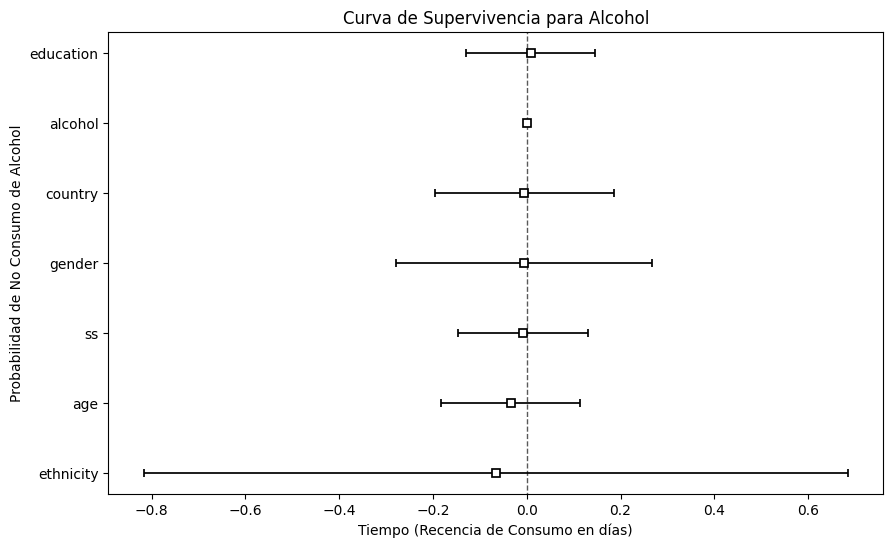

Iteration 1: norm_delta = 6.40e-01, step_size = 0.9500, log_lik = -6330.71760, newton_decrement = 3.27e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.91e-01, step_size = 0.9500, log_lik = -5963.38893, newton_decrement = 3.77e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 8.03e-02, step_size = 0.9500, log_lik = -5922.21959, newton_decrement = 2.04e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.28e-03, step_size = 1.0000, log_lik = -5920.11397, newton_decrement = 5.25e-03, seconds_since_start = 0.1
Iteration 5: norm_delta = 1.13e-05, step_size = 1.0000, log_lik = -5920.10871, newton_decrement = 3.62e-08, seconds_since_start = 0.1
Convergence success after 5 iterations.


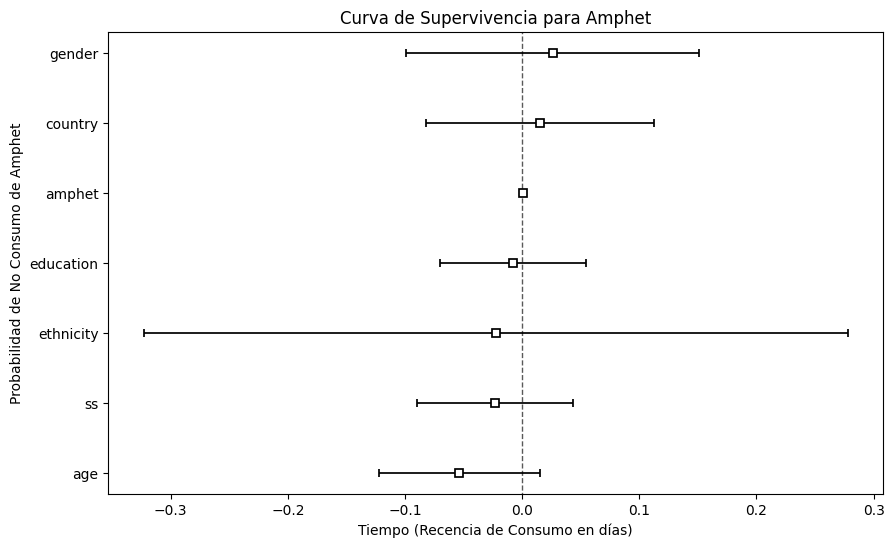

Iteration 1: norm_delta = 5.93e-01, step_size = 0.9500, log_lik = -8667.69875, newton_decrement = 3.30e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.13e-01, step_size = 0.9500, log_lik = -8290.94904, newton_decrement = 4.84e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.01e-01, step_size = 0.9500, log_lik = -8237.37667, newton_decrement = 3.37e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.27e-03, step_size = 1.0000, log_lik = -8233.86276, newton_decrement = 1.54e-02, seconds_since_start = 0.0
Iteration 5: norm_delta = 3.43e-05, step_size = 1.0000, log_lik = -8233.84728, newton_decrement = 3.40e-07, seconds_since_start = 0.0
Iteration 6: norm_delta = 7.56e-10, step_size = 1.0000, log_lik = -8233.84728, newton_decrement = 1.65e-16, seconds_since_start = 0.0
Convergence success after 6 iterations.


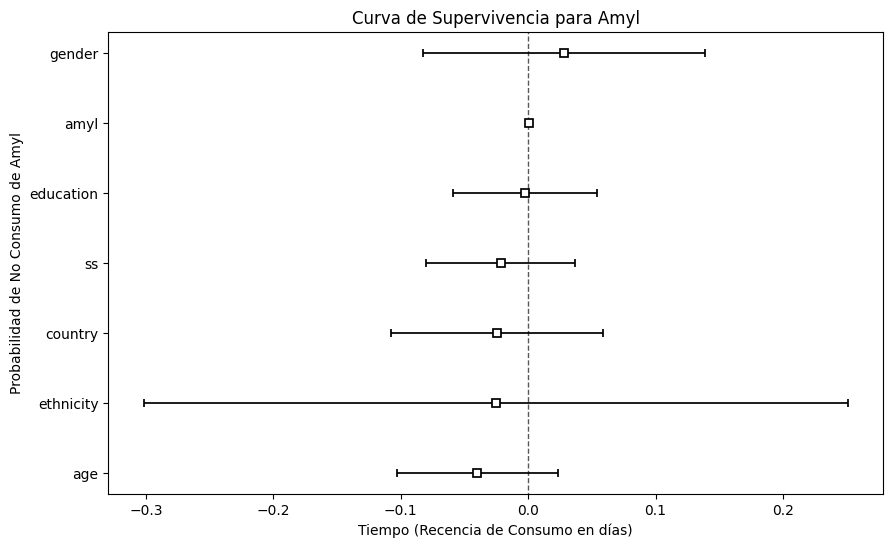

Iteration 1: norm_delta = 4.88e-01, step_size = 0.9500, log_lik = -6281.25171, newton_decrement = 1.91e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.54e-01, step_size = 0.9500, log_lik = -6062.82948, newton_decrement = 2.78e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 7.24e-02, step_size = 0.9500, log_lik = -6032.39457, newton_decrement = 1.59e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.98e-03, step_size = 1.0000, log_lik = -6030.75623, newton_decrement = 4.33e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.11e-05, step_size = 1.0000, log_lik = -6030.75190, newton_decrement = 3.32e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.


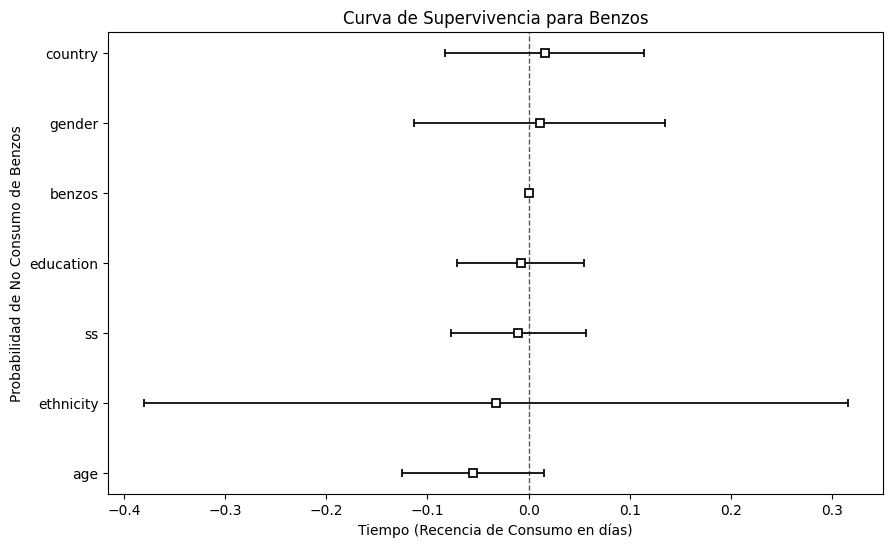

Iteration 1: norm_delta = 1.39e-01, step_size = 0.9500, log_lik = -84.22620, newton_decrement = 1.16e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.57e-02, step_size = 0.9500, log_lik = -71.59785, newton_decrement = 7.87e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.13e-03, step_size = 0.9500, log_lik = -70.75882, newton_decrement = 2.46e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.52e-04, step_size = 1.0000, log_lik = -70.73379, newton_decrement = 1.78e-05, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.86e-07, step_size = 1.0000, log_lik = -70.73377, newton_decrement = 9.66e-12, seconds_since_start = 0.0
Convergence success after 5 iterations.


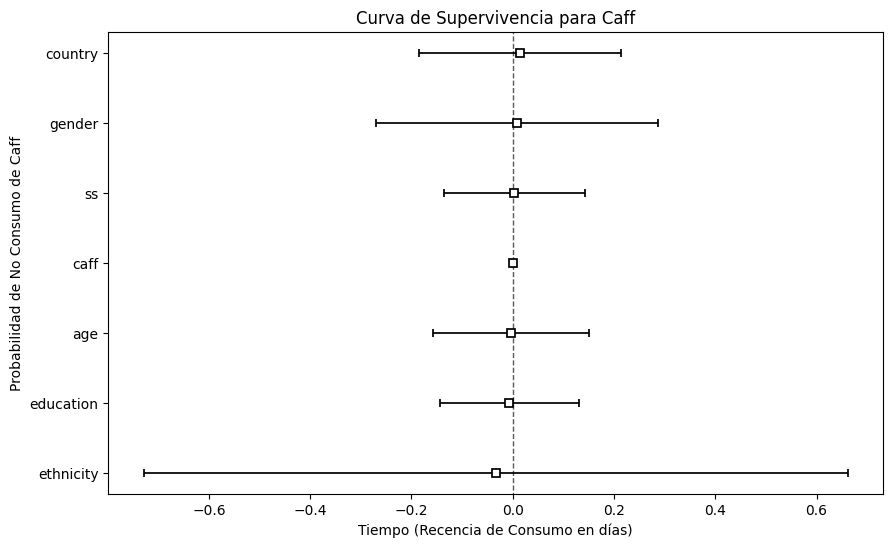

Iteration 1: norm_delta = 6.38e-01, step_size = 0.9500, log_lik = -2470.10152, newton_decrement = 2.42e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.83e-01, step_size = 0.9500, log_lik = -2213.25728, newton_decrement = 1.25e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.50e-02, step_size = 0.9500, log_lik = -2200.00572, newton_decrement = 3.65e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 8.76e-04, step_size = 1.0000, log_lik = -2199.63527, newton_decrement = 2.17e-04, seconds_since_start = 0.0
Iteration 5: norm_delta = 5.31e-07, step_size = 1.0000, log_lik = -2199.63505, newton_decrement = 7.97e-11, seconds_since_start = 0.0
Convergence success after 5 iterations.


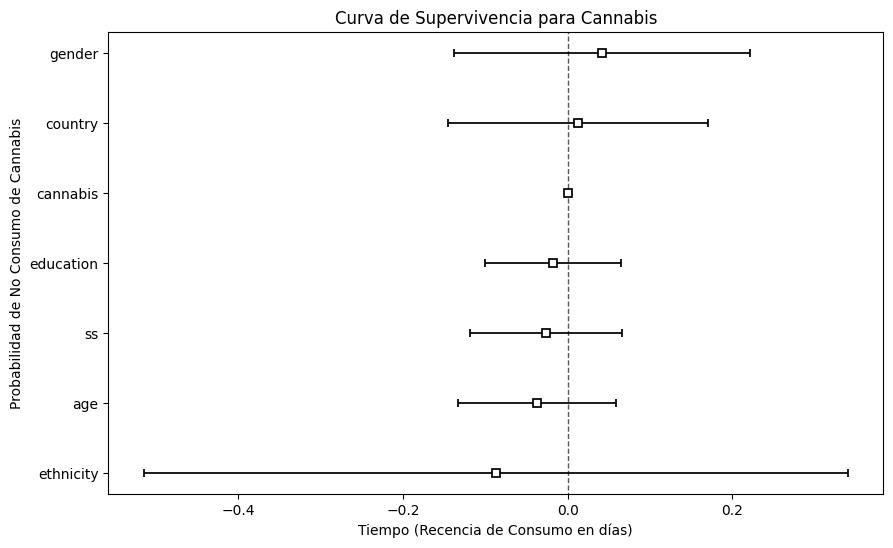

Iteration 1: norm_delta = 8.77e-02, step_size = 0.9500, log_lik = -90.34442, newton_decrement = 4.32e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.83e-02, step_size = 0.9500, log_lik = -85.45979, newton_decrement = 4.83e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 7.83e-03, step_size = 0.9500, log_lik = -84.94376, newton_decrement = 1.58e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.15e-04, step_size = 1.0000, log_lik = -84.92772, newton_decrement = 1.12e-05, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.54e-07, step_size = 1.0000, log_lik = -84.92771, newton_decrement = 5.80e-12, seconds_since_start = 0.0
Convergence success after 5 iterations.


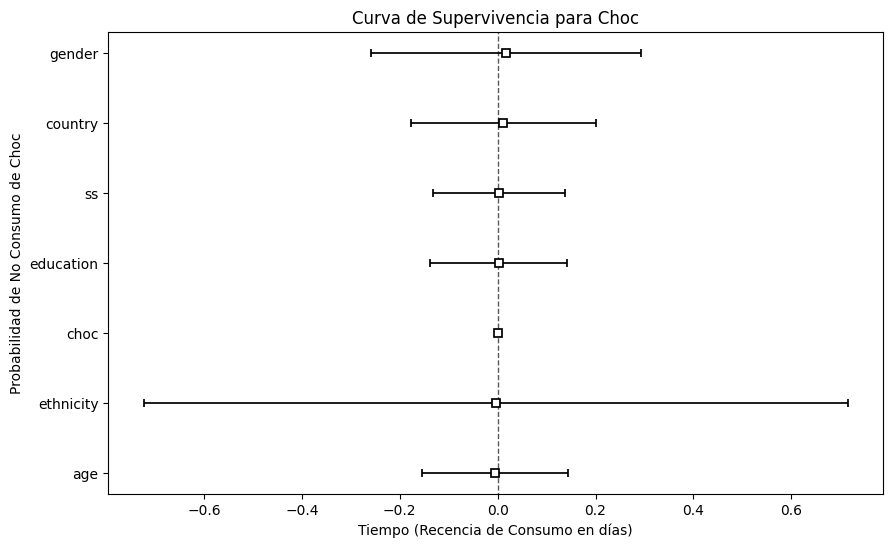

Iteration 1: norm_delta = 5.51e-01, step_size = 0.9500, log_lik = -6642.89207, newton_decrement = 2.49e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.77e-01, step_size = 0.9500, log_lik = -6359.20501, newton_decrement = 3.42e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 7.98e-02, step_size = 0.9500, log_lik = -6321.66034, newton_decrement = 1.99e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.56e-03, step_size = 1.0000, log_lik = -6319.59853, newton_decrement = 5.86e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.37e-05, step_size = 1.0000, log_lik = -6319.59266, newton_decrement = 5.25e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.


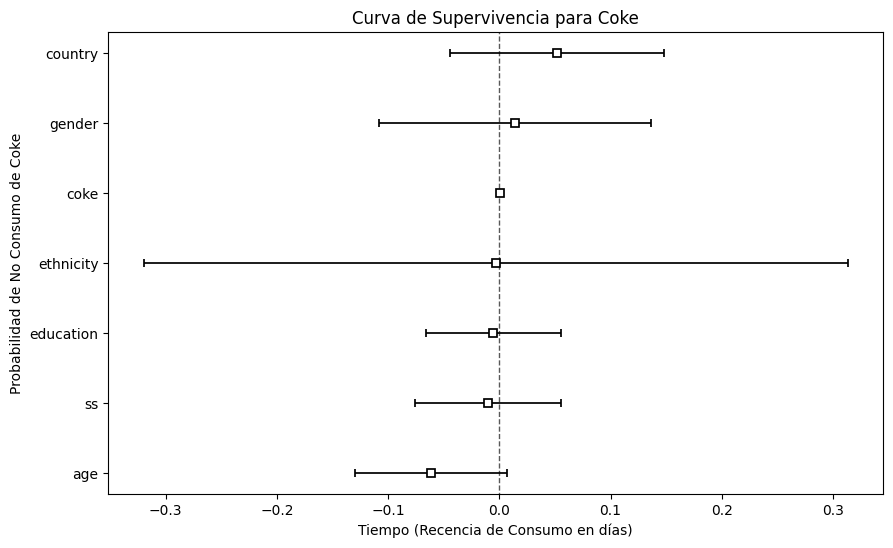

Iteration 1: norm_delta = 3.44e-01, step_size = 0.9500, log_lik = -10687.53178, newton_decrement = 1.41e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.27e-01, step_size = 0.9500, log_lik = -10521.46117, newton_decrement = 2.99e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.12e-02, step_size = 0.9500, log_lik = -10487.71472, newton_decrement = 2.97e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 9.96e-03, step_size = 1.0000, log_lik = -10484.55733, newton_decrement = 2.93e-02, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.02e-04, step_size = 1.0000, log_lik = -10484.52781, newton_decrement = 2.99e-06, seconds_since_start = 0.0
Iteration 6: norm_delta = 1.04e-08, step_size = 1.0000, log_lik = -10484.52780, newton_decrement = 3.12e-14, seconds_since_start = 0.0
Convergence success after 6 iterations.


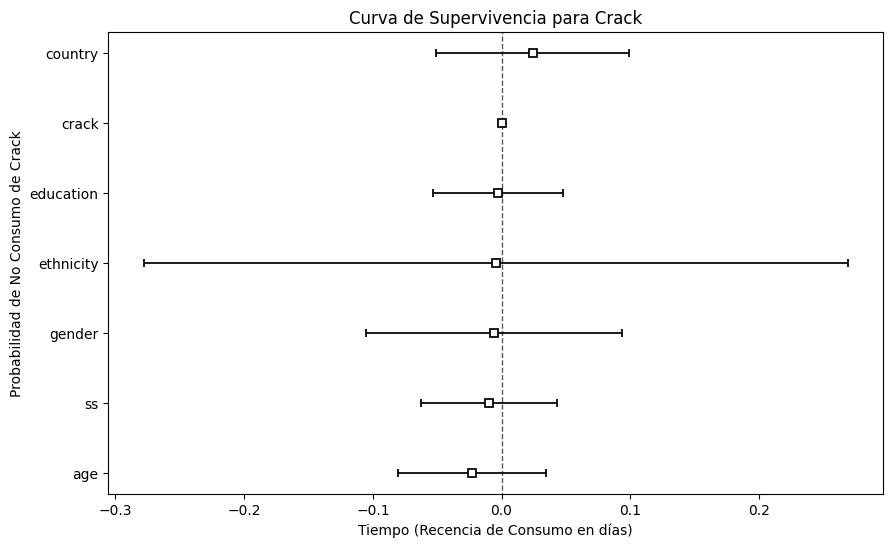

Iteration 1: norm_delta = 3.36e-01, step_size = 0.9500, log_lik = -6697.85516, newton_decrement = 5.84e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.57e-01, step_size = 0.9500, log_lik = -6631.05401, newton_decrement = 7.41e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.10e-02, step_size = 0.9500, log_lik = -6623.15609, newton_decrement = 2.27e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.37e-04, step_size = 1.0000, log_lik = -6622.92595, newton_decrement = 1.22e-04, seconds_since_start = 0.0
Iteration 5: norm_delta = 3.97e-07, step_size = 1.0000, log_lik = -6622.92583, newton_decrement = 3.56e-11, seconds_since_start = 0.0
Convergence success after 5 iterations.


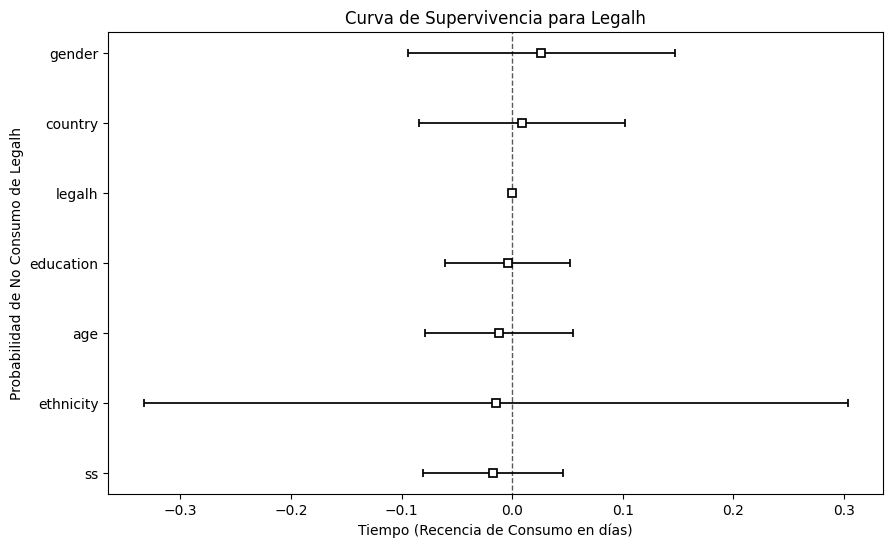

Iteration 1: norm_delta = 6.55e-01, step_size = 0.9500, log_lik = -7042.81672, newton_decrement = 3.70e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.03e-01, step_size = 0.9500, log_lik = -6627.47342, newton_decrement = 4.39e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 8.86e-02, step_size = 0.9500, log_lik = -6579.30231, newton_decrement = 2.61e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 5.33e-03, step_size = 1.0000, log_lik = -6576.60065, newton_decrement = 8.45e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.78e-05, step_size = 1.0000, log_lik = -6576.59218, newton_decrement = 9.31e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.


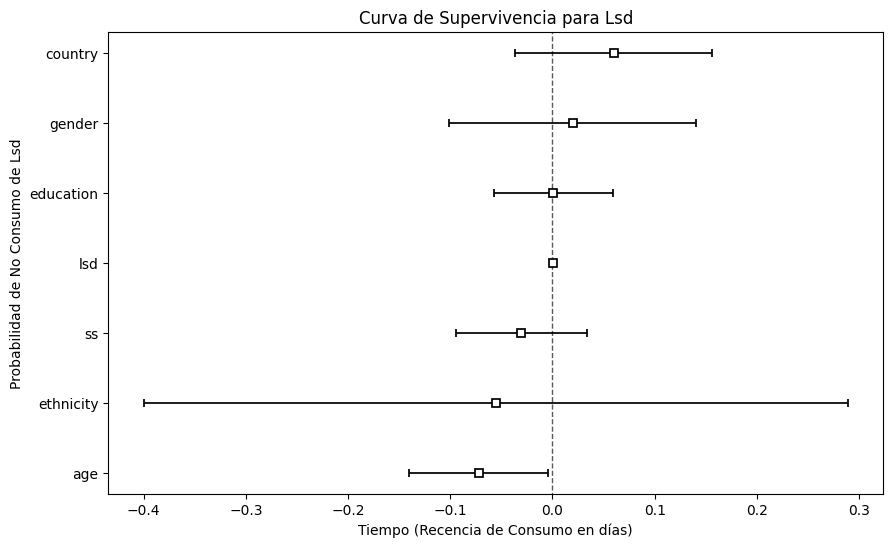

Iteration 1: norm_delta = 3.26e-01, step_size = 0.9500, log_lik = -9134.08438, newton_decrement = 8.46e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.91e-01, step_size = 0.9500, log_lik = -9035.37997, newton_decrement = 1.51e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 5.70e-02, step_size = 0.9500, log_lik = -9018.76872, newton_decrement = 9.32e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.30e-03, step_size = 1.0000, log_lik = -9017.80444, newton_decrement = 2.80e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.00e-05, step_size = 1.0000, log_lik = -9017.80163, newton_decrement = 2.56e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.


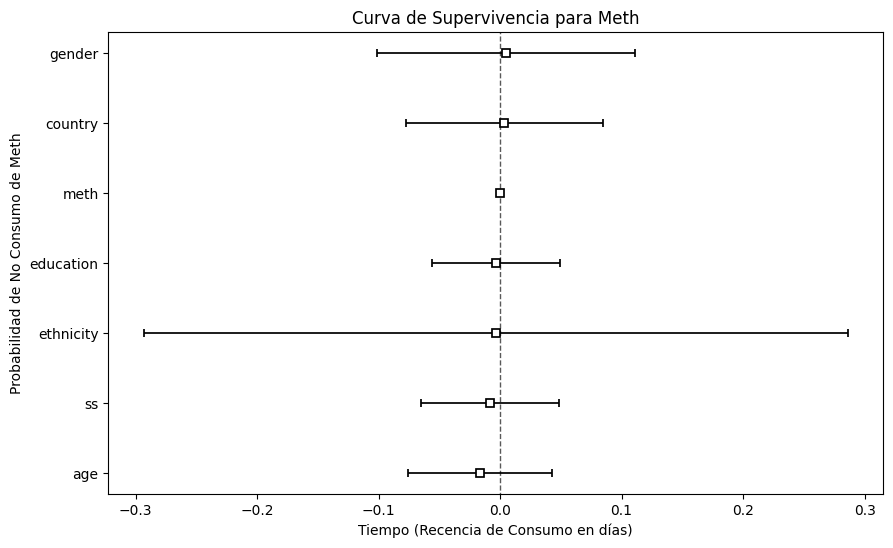

Iteration 1: norm_delta = 6.14e-01, step_size = 0.9500, log_lik = -6337.63727, newton_decrement = 3.04e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.87e-01, step_size = 0.9500, log_lik = -5995.33285, newton_decrement = 3.67e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 7.99e-02, step_size = 0.9500, log_lik = -5955.22509, newton_decrement = 2.02e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.32e-03, step_size = 1.0000, log_lik = -5953.14234, newton_decrement = 5.33e-03, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.17e-05, step_size = 1.0000, log_lik = -5953.13700, newton_decrement = 3.88e-08, seconds_since_start = 0.0
Convergence success after 5 iterations.


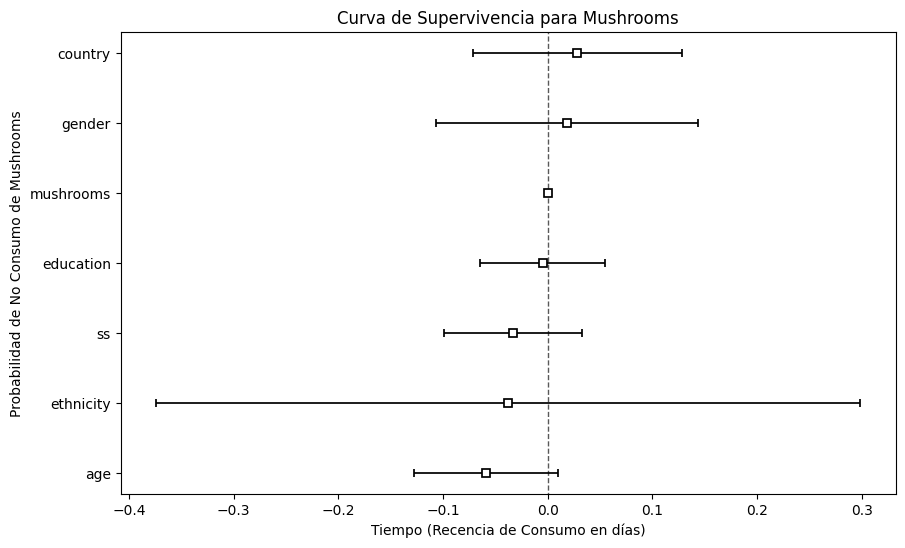

Iteration 1: norm_delta = 6.05e-01, step_size = 0.9500, log_lik = -2550.74142, newton_decrement = 2.33e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.91e-01, step_size = 0.9500, log_lik = -2301.07621, newton_decrement = 1.42e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.98e-02, step_size = 0.9500, log_lik = -2285.84697, newton_decrement = 4.78e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.18e-03, step_size = 1.0000, log_lik = -2285.35961, newton_decrement = 4.01e-04, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.01e-06, step_size = 1.0000, log_lik = -2285.35921, newton_decrement = 2.91e-10, seconds_since_start = 0.0
Convergence success after 5 iterations.


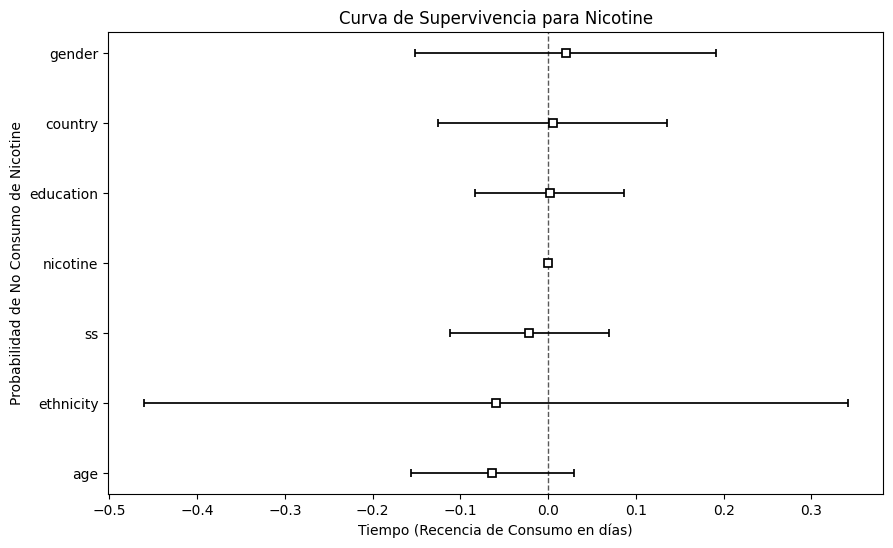

Iteration 1: norm_delta = 5.35e-02, step_size = 0.9500, log_lik = -12289.82719, newton_decrement = 7.23e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.40e-02, step_size = 0.9500, log_lik = -12281.11968, newton_decrement = 2.12e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.69e-02, step_size = 0.9500, log_lik = -12278.63422, newton_decrement = 4.02e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.25e-03, step_size = 1.0000, log_lik = -12278.18230, newton_decrement = 1.95e-02, seconds_since_start = 0.0
Iteration 5: norm_delta = 4.02e-04, step_size = 1.0000, log_lik = -12278.16211, newton_decrement = 5.41e-05, seconds_since_start = 0.0
Iteration 6: norm_delta = 1.13e-06, step_size = 1.0000, log_lik = -12278.16206, newton_decrement = 4.27e-10, seconds_since_start = 0.0
Convergence success after 6 iterations.


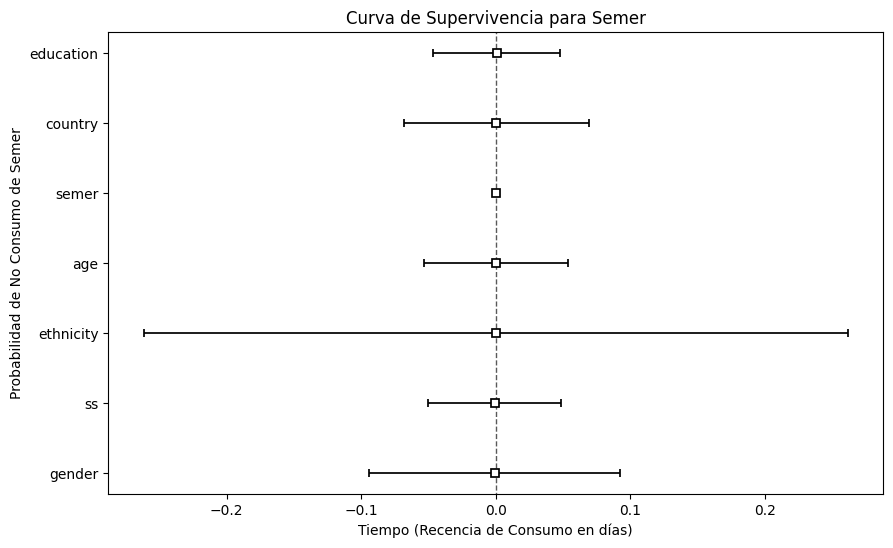

In [150]:
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
import pandas as pd

def generar_curvas_supervivencia(df, droga, variables):
    # Asegurémonos de que 'time' esté en días
    df['time'] = df[droga].where(df[droga] != -3650, 3650)  # Ajuste de los valores de 'time'
    
    # Si el 'time' está en otro formato, transformémoslo a días (en caso de que sea necesario)
    # Aquí puedes aplicar alguna transformación si es que tus datos no están en días ya, ejemplo:
    # df['time'] = df['time'] / 24  # Si 'time' estuviera en horas, convertimos a días
    
    # Crear la columna de evento para la droga (1 si hubo consumo, 0 si no)
    df['event_column'] = (df[droga] > 0).astype(int)
    
    # Prepara el DataFrame con las variables relevantes
    df_droga = df[variables + ['time', 'event_column', droga]]  # Selecciona las columnas necesarias
    
    # Ajustar el modelo de Cox
    cph = CoxPHFitter(penalizer=0.1)  # Usa la penalización Lasso si lo deseas
    cph.fit(df_droga, duration_col='time', event_col='event_column', show_progress=True)
    
    # Generar y graficar la curva de supervivencia
    plt.figure(figsize=(10, 6))
    cph.plot()  # Esto generará la curva de supervivencia basada en el modelo ajustado
    plt.title(f"Curva de Supervivencia para {droga.capitalize()}")
    plt.xlabel("Tiempo (Recencia de Consumo en días)")  # Ya estamos trabajando en días
    plt.ylabel(f"Probabilidad de No Consumo de {droga.capitalize()}")
    plt.show()

# Lista de drogas que tienes en tu DataFrame
drogas = ["alcohol", "amphet", "amyl", "benzos", "caff", 
          "cannabis", "choc", "coke", "crack", "legalh", 
          "lsd", "meth", "mushrooms", "nicotine", "semer"]

# Variables seleccionadas para el análisis
variables_seleccionadas = ["age", "gender", "education", "country", "ethnicity", "ss"]  # Ajusta según tu caso

# Iterar sobre todas las drogas y generar las curvas de supervivencia
for droga in drogas:
    generar_curvas_supervivencia(df, droga, variables_seleccionadas)


In [151]:
print(df[['alcohol', 'amphet', 'amyl', 'benzos', 'caff']].head())


   alcohol  amphet  amyl  benzos  caff
0       -7   -1825  3650   -1825    -1
1       -7   -1825 -1825    3650    -1
2       -1    3650  3650    3650    -1
3      -30    3650  3650    -365    -7
4      -30   -3650 -3650    3650    -1


In [152]:
# Verificar valores únicos de las drogas en el DataFrame
for droga in drogas:
    print(f"Valores únicos para {droga}:")
    print(df[droga].unique())


Valores únicos para alcohol:
[   -7    -1   -30 -1825 -3650  3650  -365]
Valores únicos para amphet:
[-1825  3650 -3650  -365    -7   -30    -1]
Valores únicos para amyl:
[ 3650 -1825 -3650  -365    -7   -30    -1]
Valores únicos para benzos:
[-1825  3650  -365 -3650   -30    -7    -1]
Valores únicos para caff:
[   -1    -7   -30  -365  3650 -3650 -1825]
Valores únicos para cannabis:
[ 3650   -30  -365 -1825 -3650    -1    -7]
Valores únicos para choc:
[   -7    -1   -30  3650  -365 -1825 -3650]
Valores únicos para coke:
[ 3650  -365 -1825 -3650    -1    -7   -30]
Valores únicos para crack:
[ 3650 -3650 -1825  -365    -7   -30    -1]
Valores únicos para legalh:
[ 3650 -3650 -1825  -365    -7   -30    -1]
Valores únicos para lsd:
[ 3650 -1825 -3650  -365   -30    -7    -1]
Valores únicos para meth:
[ 3650  -365 -3650    -1   -30 -1825    -7]
Valores únicos para mushrooms:
[ 3650 -3650 -1825  -365   -30    -7    -1]
Valores únicos para nicotine:
[-1825   -30  3650    -1 -3650  -365    -7

In [153]:
for droga in drogas:
    print(f"Cantidad de registros para {droga}: {df[df[droga] == 1].shape[0]}")


Cantidad de registros para alcohol: 0
Cantidad de registros para amphet: 0
Cantidad de registros para amyl: 0
Cantidad de registros para benzos: 0
Cantidad de registros para caff: 0
Cantidad de registros para cannabis: 0
Cantidad de registros para choc: 0
Cantidad de registros para coke: 0
Cantidad de registros para crack: 0
Cantidad de registros para legalh: 0
Cantidad de registros para lsd: 0
Cantidad de registros para meth: 0
Cantidad de registros para mushrooms: 0
Cantidad de registros para nicotine: 0
Cantidad de registros para semer: 0


In [154]:
import matplotlib.pyplot as plt

def graficar_curvas_supervivencia(cph, df, variable, valores, titulo):
    """
    Grafica curvas de supervivencia estratificadas por una característica clave.
    
    Args:
    - cph: Modelo ajustado (CoxPHFitter).
    - df: DataFrame original.
    - variable: Característica clave para estratificar (ej. 'nscore').
    - valores: Lista con valores a estratificar (ej. [bajo, alto]).
    - titulo: Título del gráfico.
    """
    plt.figure(figsize=(10, 6))
    
    for valor in valores:
        # Filtrar por subgrupo
        subgrupo = df[df[variable] == valor]
        # Predecir la función de supervivencia
        curva = cph.predict_survival_function(subgrupo).mean(axis=1)
        plt.step(curva.index, curva, label=f"{variable} = {valor}")
    
    plt.title(titulo)
    plt.xlabel("Tiempo")
    plt.ylabel("Probabilidad de supervivencia")
    plt.legend()
    plt.grid(True)
    plt.show()

In [155]:
from sklearn.decomposition import PCA

# Selecciona las columnas que quieres reducir (por ejemplo, las variables de personalidad)
personality_columns = ["nscore", "escore", "oscore", "ascore", "cscore"]

# Aplica PCA
pca = PCA(n_components=2)  # Elige cuántos componentes deseas mantener
principal_components = pca.fit_transform(df[personality_columns])

# Crea un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Agrega los componentes principales al DataFrame original
df = pd.concat([df, df_pca], axis=1)

# Verifica las primeras filas
print(df.head())

       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  ...   lsd  meth  mushrooms  nicotine  semer   vsa  time  \
0 -0.91699 -0.00665  ...  3650  3650       3650     -1825   3650  3650  3650   
1  0.76096 -0.14277  ... -1825  -365       3650       -30   3650  3650  3650   
2 -1.62090 -1.01450  ...  3650  3650      -3650      3650   3650  3650  3650   
3  0.59042  0.58489  ...  3650  3650       3650     -1825   3650  3650  3650   
4 -0.30172  1.30612  ...  3650  3650      -1825     -1825   3650  3650  3650   

   event_column      PCA1      P

In [156]:
from lifelines import CoxPHFitter

def ajustar_modelo_cox(df, droga):
    # Crear la columna de evento para la droga específica
    df['event_column'] = (df[droga] > 0).astype(int)

    # Prepara el DataFrame para la droga específica
    df_droga = df[["age", "gender", "education", "country", "ethnicity", 
                   "nscore", "escore", "oscore", "ascore", "cscore", 
                   "impuslive", "ss", droga, "event_column"]]

    # Ajustar el modelo de Cox con regularización Lasso (penalización L1)
    cph = CoxPHFitter(penalizer=0.1)  # Ajusta el valor de penalización según sea necesario
    cph.fit(df_droga, duration_col=droga, event_col='event_column', show_progress=True)
    
    # Mostrar el resumen del modelo
    print(f"Modelo para {droga}:")
    cph.print_summary()
    print("\n" + "-"*50 + "\n")

# Itera sobre todas las columnas de drogas y ajusta el modelo
for droga in y.columns:
    ajustar_modelo_cox(df, droga)

Iteration 1: norm_delta = 1.20e-16, step_size = 0.9500, log_lik = -88.58083, newton_decrement = 1.50e-30, seconds_since_start = 0.0
Convergence success after 1 iterations.
Modelo para alcohol:


ZeroDivisionError: No admissable pairs in the dataset.

Iteration 1: norm_delta = 1.85e-01, step_size = 0.9500, log_lik = -12079.64463, newton_decrement = 2.65e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 8.46e-03, step_size = 0.9500, log_lik = -12053.32371, newton_decrement = 5.95e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 4.24e-04, step_size = 0.9500, log_lik = -12053.26439, newton_decrement = 1.50e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.51e-08, step_size = 1.0000, log_lik = -12053.26424, newton_decrement = 1.86e-13, seconds_since_start = 0.0
Convergence success after 4 iterations.


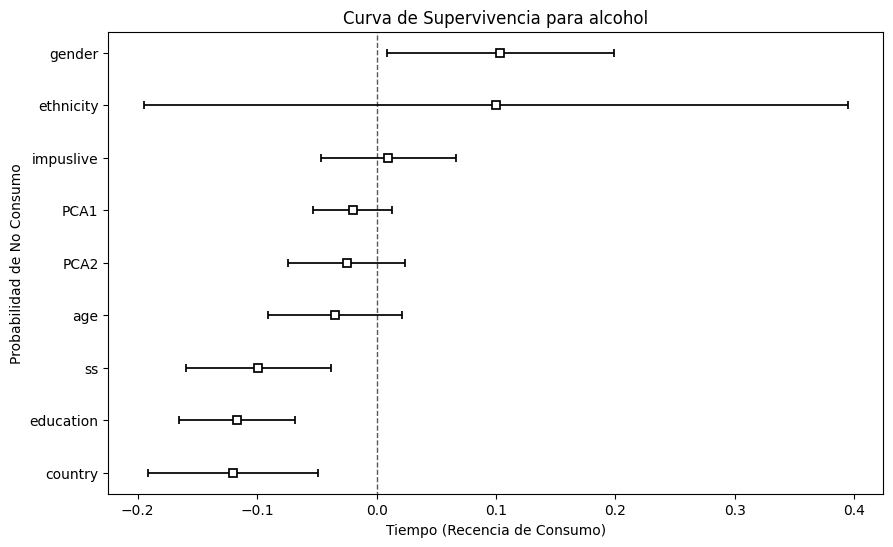

Iteration 1: norm_delta = 4.02e-01, step_size = 0.9500, log_lik = -5287.74689, newton_decrement = 9.24e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.79e-02, step_size = 0.9500, log_lik = -5199.09068, newton_decrement = 1.34e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.08e-04, step_size = 0.9500, log_lik = -5198.95660, newton_decrement = 3.47e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 6.79e-08, step_size = 1.0000, log_lik = -5198.95625, newton_decrement = 2.02e-12, seconds_since_start = 0.0
Convergence success after 4 iterations.


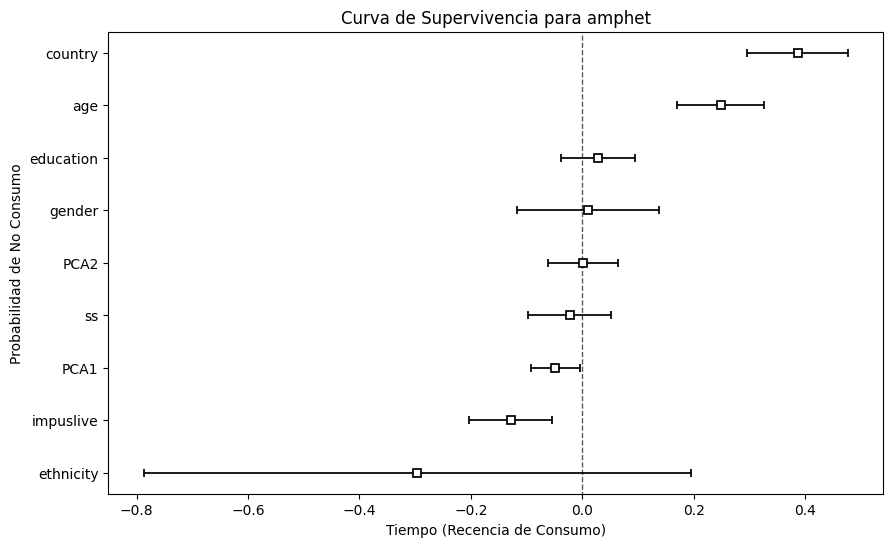

Iteration 1: norm_delta = 4.19e-01, step_size = 0.9500, log_lik = -3114.65690, newton_decrement = 5.45e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.84e-02, step_size = 0.9500, log_lik = -3060.93068, newton_decrement = 1.24e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.86e-04, step_size = 0.9500, log_lik = -3060.80713, newton_decrement = 3.43e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.50e-07, step_size = 1.0000, log_lik = -3060.80678, newton_decrement = 1.56e-11, seconds_since_start = 0.0
Convergence success after 4 iterations.


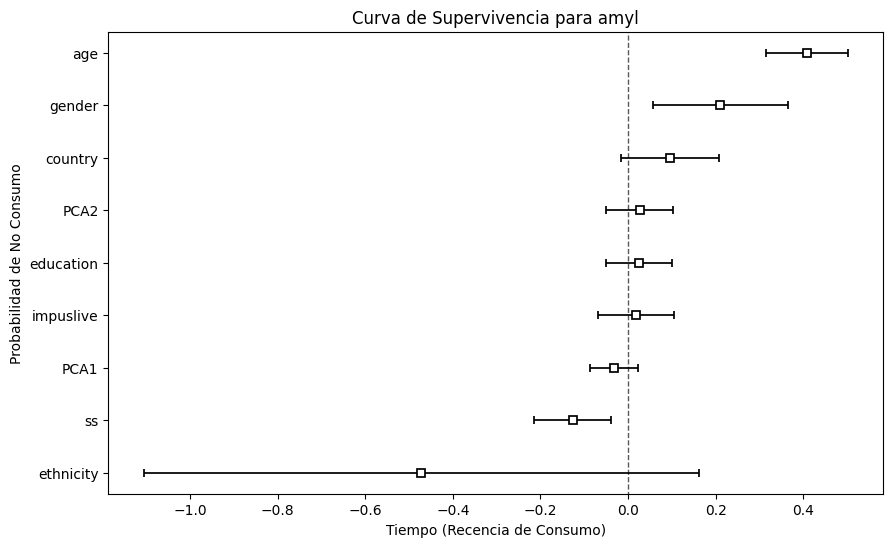

Iteration 1: norm_delta = 2.84e-01, step_size = 0.9500, log_lik = -5124.55689, newton_decrement = 5.39e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.09e-02, step_size = 0.9500, log_lik = -5072.66535, newton_decrement = 5.91e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 6.94e-04, step_size = 0.9500, log_lik = -5072.60594, newton_decrement = 2.32e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.90e-07, step_size = 1.0000, log_lik = -5072.60570, newton_decrement = 3.10e-10, seconds_since_start = 0.0
Convergence success after 4 iterations.


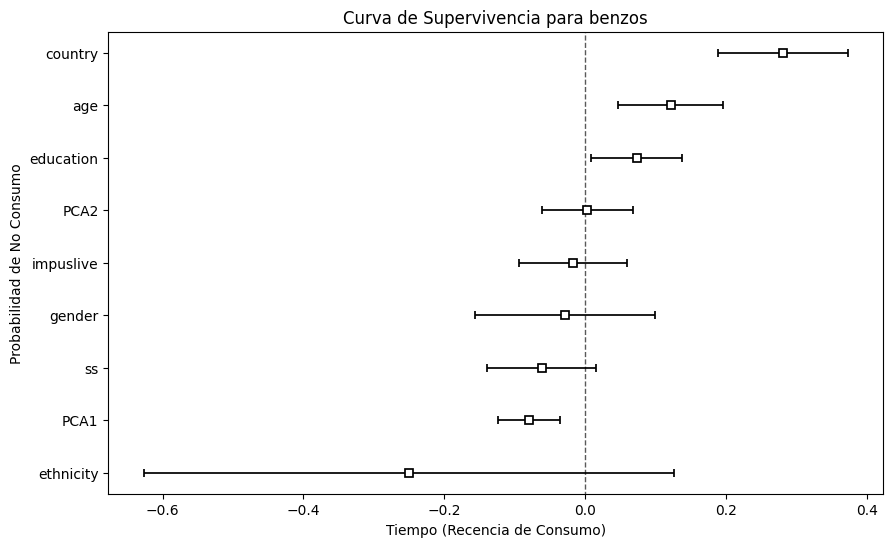

Iteration 1: norm_delta = 7.83e-02, step_size = 0.9500, log_lik = -12132.32411, newton_decrement = 6.28e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.93e-03, step_size = 0.9500, log_lik = -12126.02392, newton_decrement = 2.25e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.52e-04, step_size = 0.9500, log_lik = -12126.00146, newton_decrement = 5.84e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.51e-08, step_size = 1.0000, log_lik = -12126.00140, newton_decrement = 1.89e-13, seconds_since_start = 0.0
Convergence success after 4 iterations.


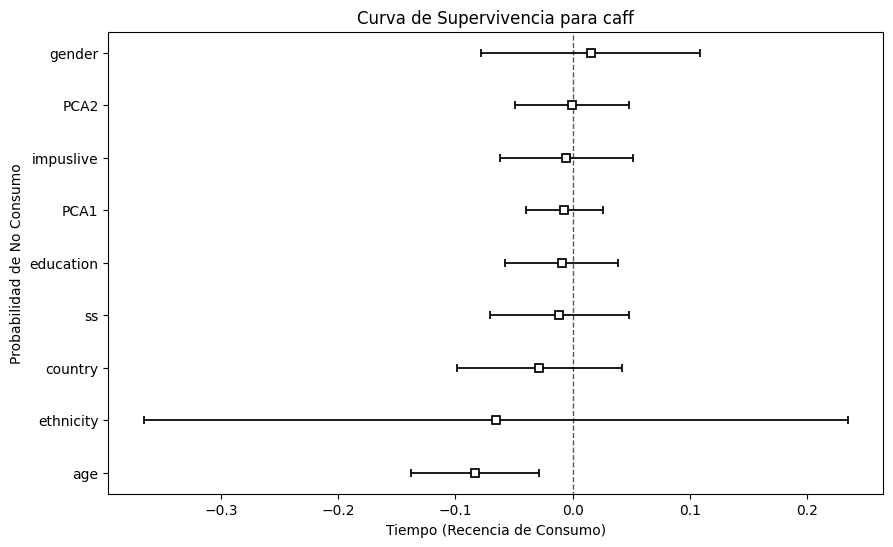

Iteration 1: norm_delta = 4.10e-01, step_size = 0.9500, log_lik = -9269.88957, newton_decrement = 1.84e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.64e-02, step_size = 0.9500, log_lik = -9092.29051, newton_decrement = 1.85e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 8.18e-04, step_size = 0.9500, log_lik = -9092.10609, newton_decrement = 4.60e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.14e-08, step_size = 1.0000, log_lik = -9092.10563, newton_decrement = 3.51e-12, seconds_since_start = 0.0
Convergence success after 4 iterations.


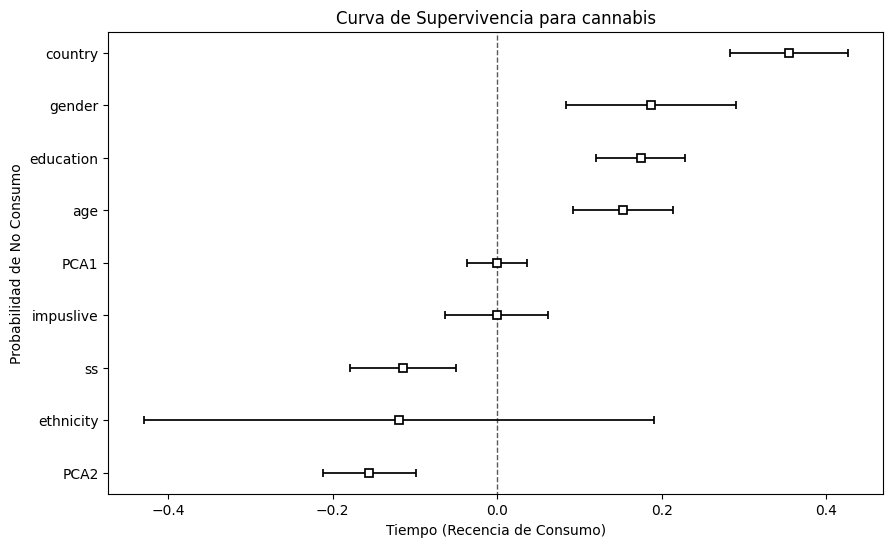

Iteration 1: norm_delta = 9.65e-02, step_size = 0.9500, log_lik = -12094.69322, newton_decrement = 1.08e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.46e-03, step_size = 0.9500, log_lik = -12083.99825, newton_decrement = 1.36e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.72e-04, step_size = 0.9500, log_lik = -12083.98471, newton_decrement = 3.37e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.56e-09, step_size = 1.0000, log_lik = -12083.98468, newton_decrement = 1.51e-14, seconds_since_start = 0.0
Convergence success after 4 iterations.


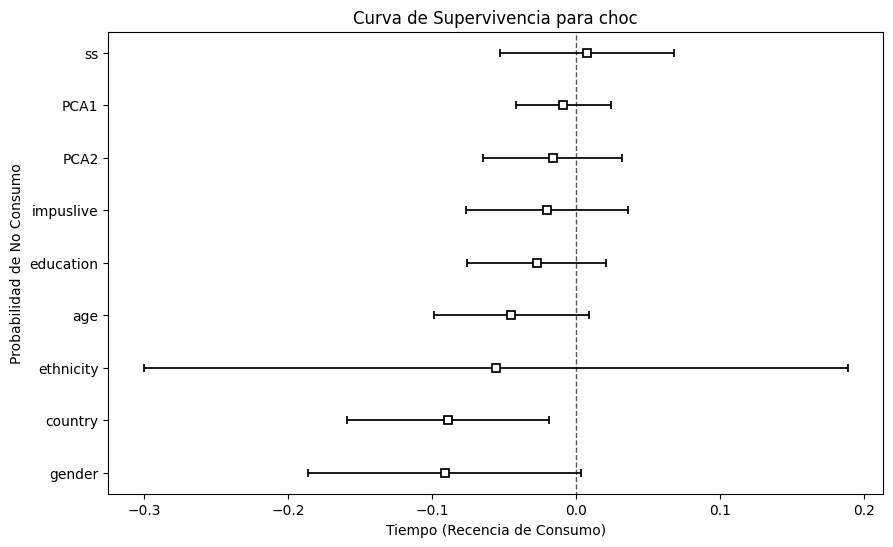

Iteration 1: norm_delta = 4.38e-01, step_size = 0.9500, log_lik = -4867.51038, newton_decrement = 7.93e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.96e-02, step_size = 0.9500, log_lik = -4792.36937, newton_decrement = 1.64e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.07e-03, step_size = 0.9500, log_lik = -4792.20506, newton_decrement = 4.83e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.18e-07, step_size = 1.0000, log_lik = -4792.20458, newton_decrement = 4.40e-11, seconds_since_start = 0.0
Convergence success after 4 iterations.


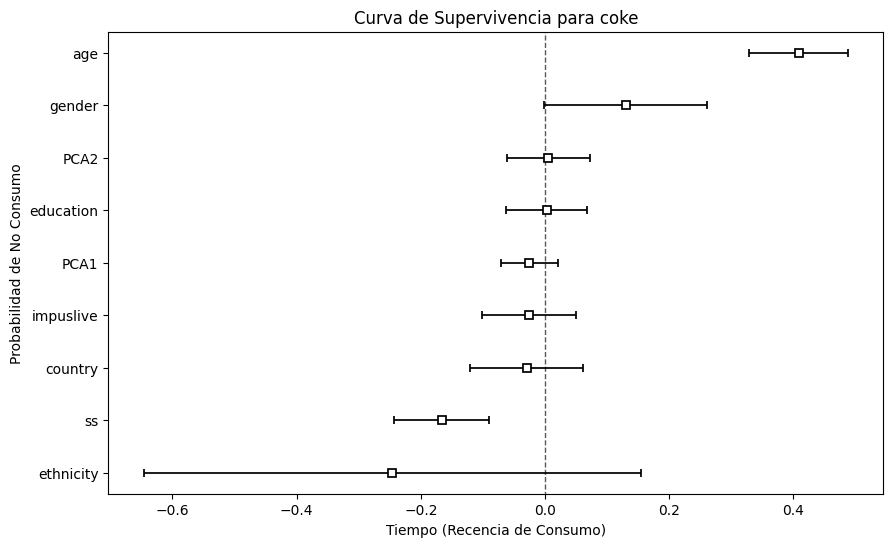

Iteration 1: norm_delta = 2.69e-01, step_size = 0.9500, log_lik = -1178.35931, newton_decrement = 1.56e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 7.07e-03, step_size = 0.9500, log_lik = -1163.15527, newton_decrement = 9.67e-03, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.56e-04, step_size = 0.9500, log_lik = -1163.14563, newton_decrement = 2.46e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.57e-08, step_size = 1.0000, log_lik = -1163.14560, newton_decrement = 5.21e-14, seconds_since_start = 0.0
Convergence success after 4 iterations.


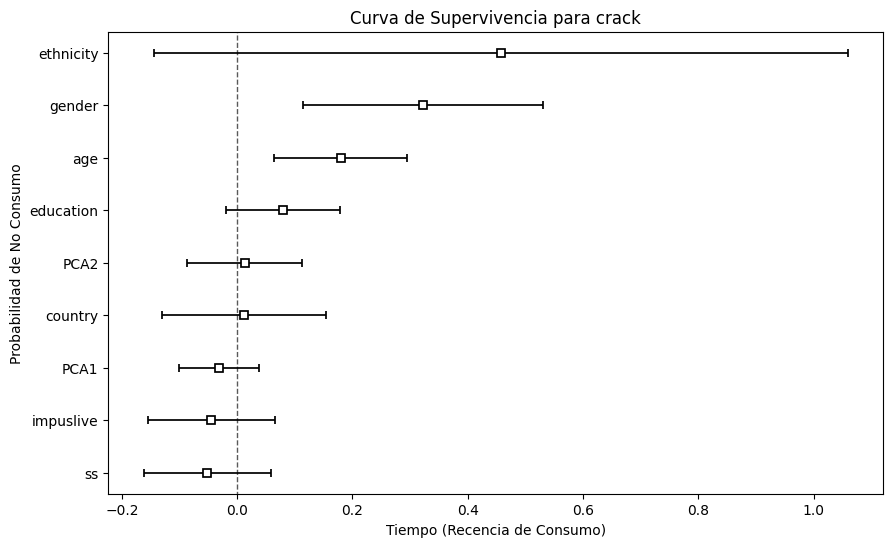

Iteration 1: norm_delta = 3.47e-01, step_size = 0.9500, log_lik = -4982.29869, newton_decrement = 4.99e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.64e-02, step_size = 0.9500, log_lik = -4935.16675, newton_decrement = 1.18e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 8.75e-04, step_size = 0.9500, log_lik = -4935.04899, newton_decrement = 3.28e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.87e-07, step_size = 1.0000, log_lik = -4935.04866, newton_decrement = 1.33e-11, seconds_since_start = 0.0
Convergence success after 4 iterations.


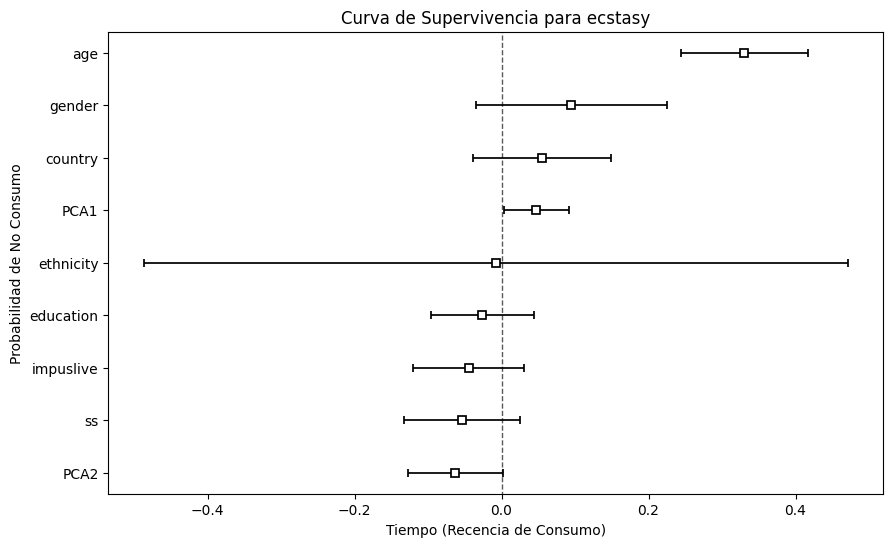

Iteration 1: norm_delta = 3.71e-01, step_size = 0.9500, log_lik = -1301.47772, newton_decrement = 2.79e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.03e-02, step_size = 0.9500, log_lik = -1274.71013, newton_decrement = 2.46e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 5.23e-04, step_size = 0.9500, log_lik = -1274.68558, newton_decrement = 6.36e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 5.74e-08, step_size = 1.0000, log_lik = -1274.68551, newton_decrement = 7.93e-13, seconds_since_start = 0.0
Convergence success after 4 iterations.


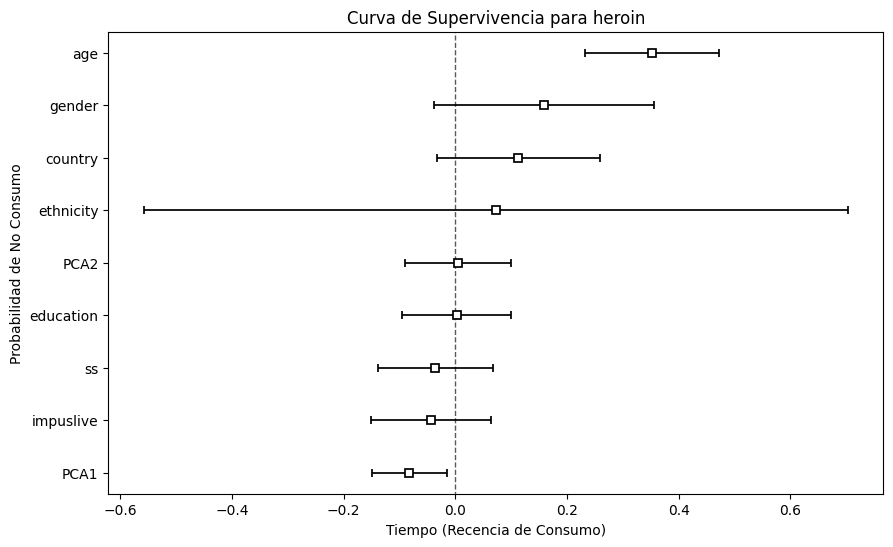

Iteration 1: norm_delta = 2.92e-01, step_size = 0.9500, log_lik = -1970.56847, newton_decrement = 1.64e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 8.53e-03, step_size = 0.9500, log_lik = -1954.50406, newton_decrement = 1.49e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 4.31e-04, step_size = 0.9500, log_lik = -1954.48915, newton_decrement = 3.81e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.44e-08, step_size = 1.0000, log_lik = -1954.48911, newton_decrement = 4.40e-14, seconds_since_start = 0.0
Convergence success after 4 iterations.


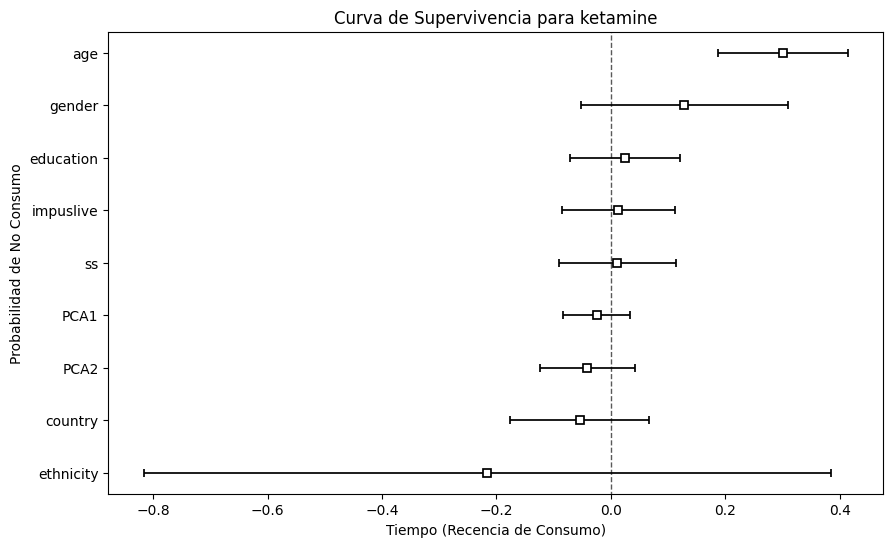

Iteration 1: norm_delta = 1.72e-01, step_size = 0.9500, log_lik = -4491.83439, newton_decrement = 1.72e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 7.52e-03, step_size = 0.9500, log_lik = -4474.99616, newton_decrement = 2.54e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 4.37e-04, step_size = 0.9500, log_lik = -4474.97075, newton_decrement = 8.38e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.49e-07, step_size = 1.0000, log_lik = -4474.97067, newton_decrement = 2.59e-11, seconds_since_start = 0.0
Convergence success after 4 iterations.


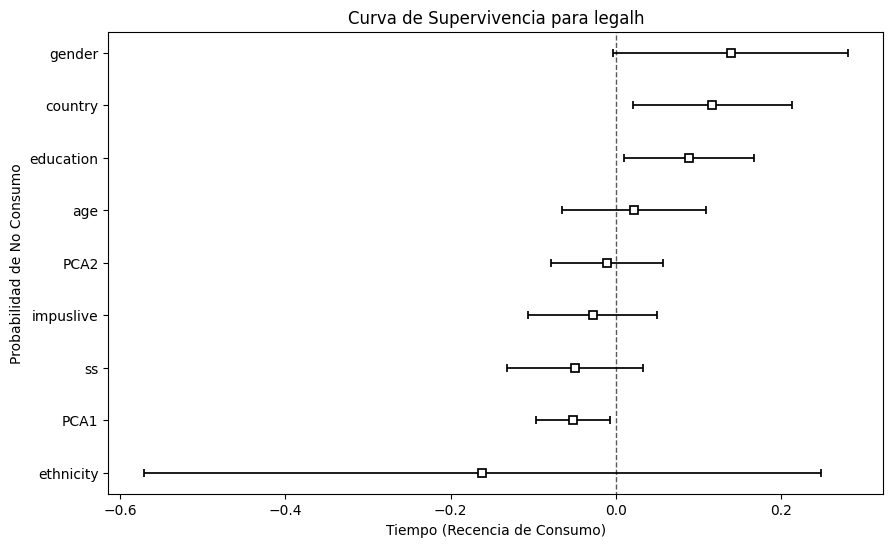

Iteration 1: norm_delta = 6.71e-01, step_size = 0.9500, log_lik = -4659.07336, newton_decrement = 1.82e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 6.76e-02, step_size = 0.9500, log_lik = -4495.87986, newton_decrement = 2.15e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 4.21e-03, step_size = 0.9500, log_lik = -4493.71846, newton_decrement = 8.08e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.92e-06, step_size = 1.0000, log_lik = -4493.71038, newton_decrement = 6.69e-09, seconds_since_start = 0.0
Convergence success after 4 iterations.


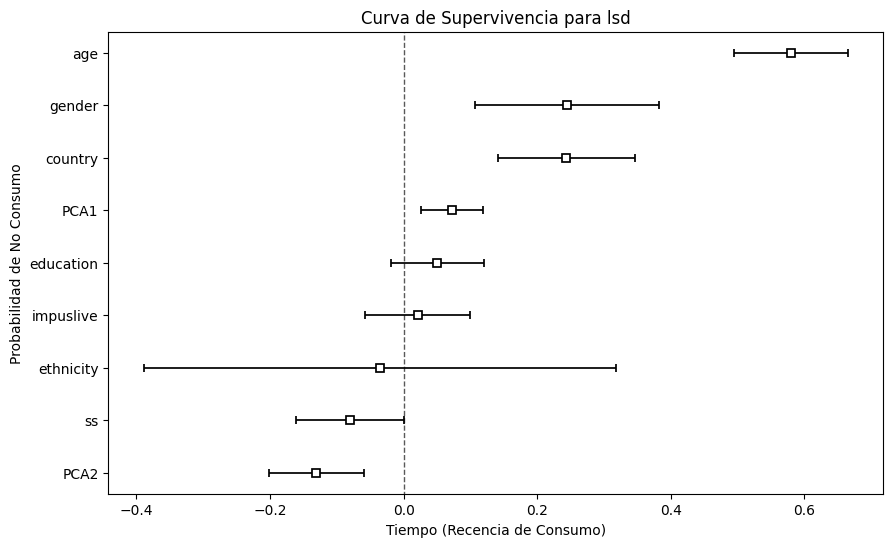

Iteration 1: norm_delta = 1.46e-01, step_size = 0.9500, log_lik = -2339.83709, newton_decrement = 7.07e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.48e-03, step_size = 0.9500, log_lik = -2332.87876, newton_decrement = 6.95e-03, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.24e-04, step_size = 0.9500, log_lik = -2332.87183, newton_decrement = 1.73e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.83e-09, step_size = 1.0000, log_lik = -2332.87181, newton_decrement = 5.23e-15, seconds_since_start = 0.0
Convergence success after 4 iterations.


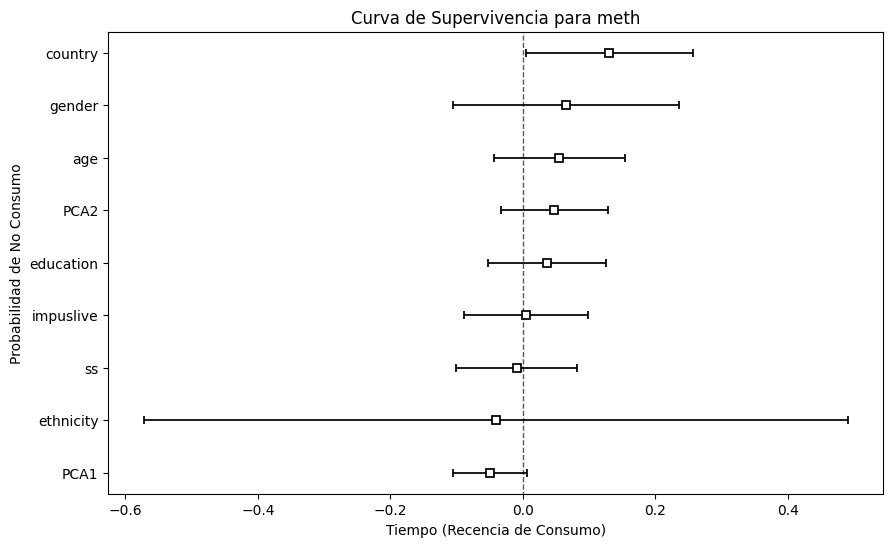

Iteration 1: norm_delta = 4.72e-01, step_size = 0.9500, log_lik = -5246.88936, newton_decrement = 1.23e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.57e-02, step_size = 0.9500, log_lik = -5134.87079, newton_decrement = 1.04e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.75e-03, step_size = 0.9500, log_lik = -5133.82594, newton_decrement = 3.65e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.00e-06, step_size = 1.0000, log_lik = -5133.82229, newton_decrement = 1.87e-09, seconds_since_start = 0.0
Convergence success after 4 iterations.


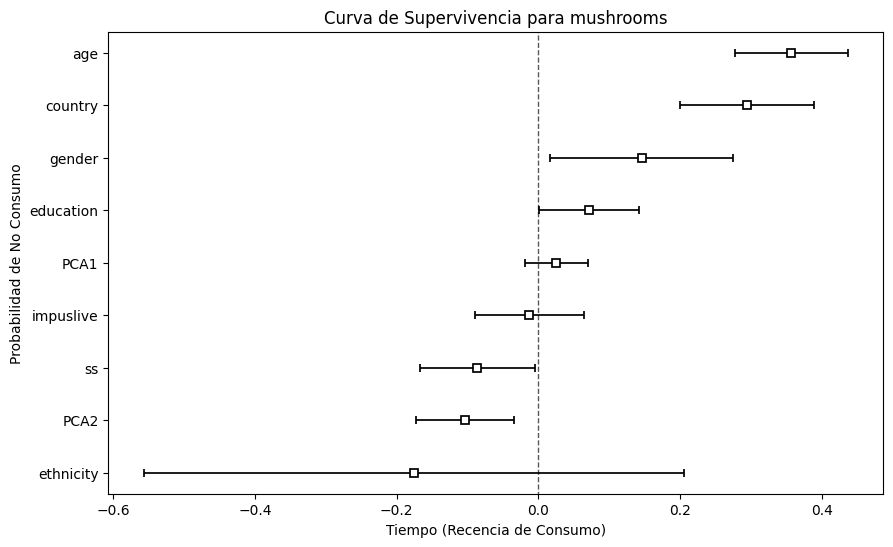

Iteration 1: norm_delta = 1.70e-01, step_size = 0.9500, log_lik = -9160.54548, newton_decrement = 3.70e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.99e-03, step_size = 0.9500, log_lik = -9124.17078, newton_decrement = 3.36e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.50e-04, step_size = 0.9500, log_lik = -9124.13731, newton_decrement = 8.36e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 9.26e-09, step_size = 1.0000, log_lik = -9124.13723, newton_decrement = 5.79e-14, seconds_since_start = 0.0
Convergence success after 4 iterations.


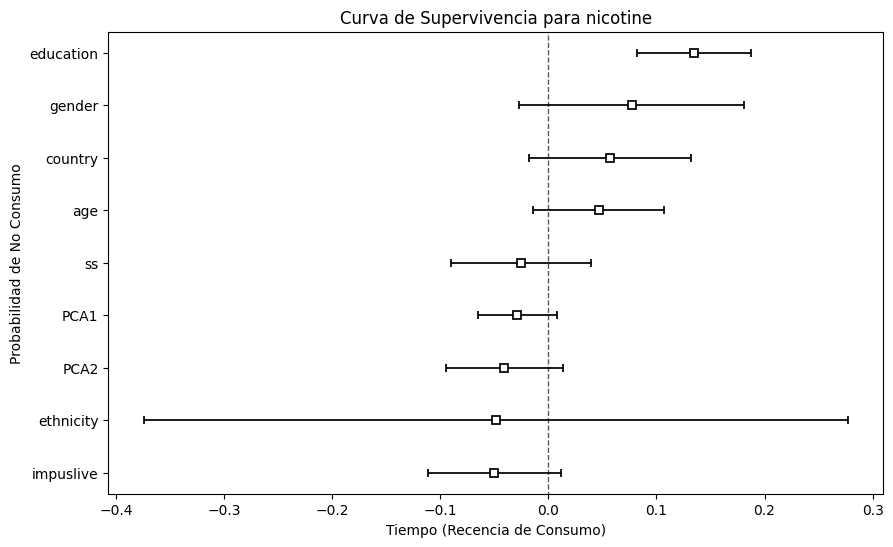

Iteration 1: norm_delta = 3.94e-02, step_size = 0.9500, log_lik = -10.60460, newton_decrement = 1.62e-01, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.04e-03, step_size = 0.9500, log_lik = -10.44252, newton_decrement = 4.33e-04, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.02e-04, step_size = 0.9500, log_lik = -10.44209, newton_decrement = 1.09e-06, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.09e-10, step_size = 1.0000, log_lik = -10.44209, newton_decrement = 5.27e-17, seconds_since_start = 0.0
Convergence success after 4 iterations.


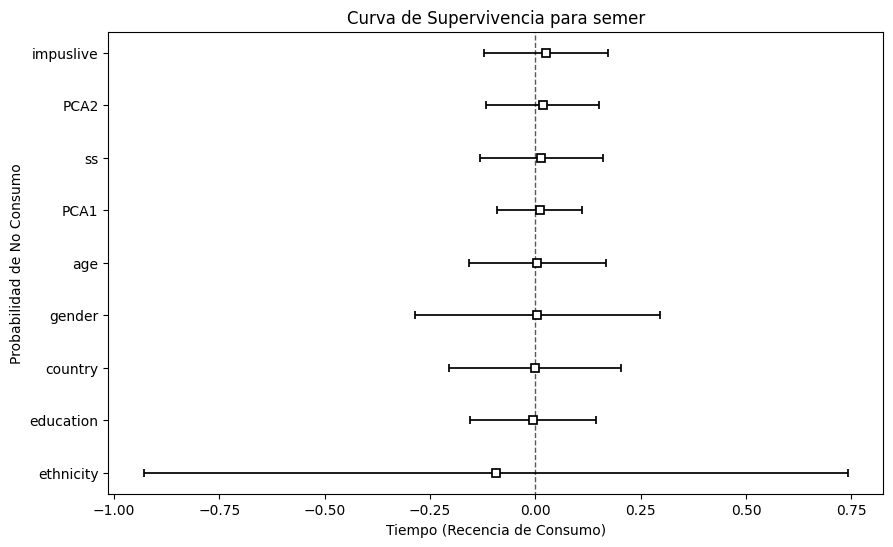

Iteration 1: norm_delta = 4.34e-01, step_size = 0.9500, log_lik = -2181.37866, newton_decrement = 4.66e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.13e-02, step_size = 0.9500, log_lik = -2137.26167, newton_decrement = 1.21e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.32e-03, step_size = 0.9500, log_lik = -2137.14028, newton_decrement = 4.63e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.08e-06, step_size = 1.0000, log_lik = -2137.13982, newton_decrement = 1.29e-09, seconds_since_start = 0.0
Convergence success after 4 iterations.


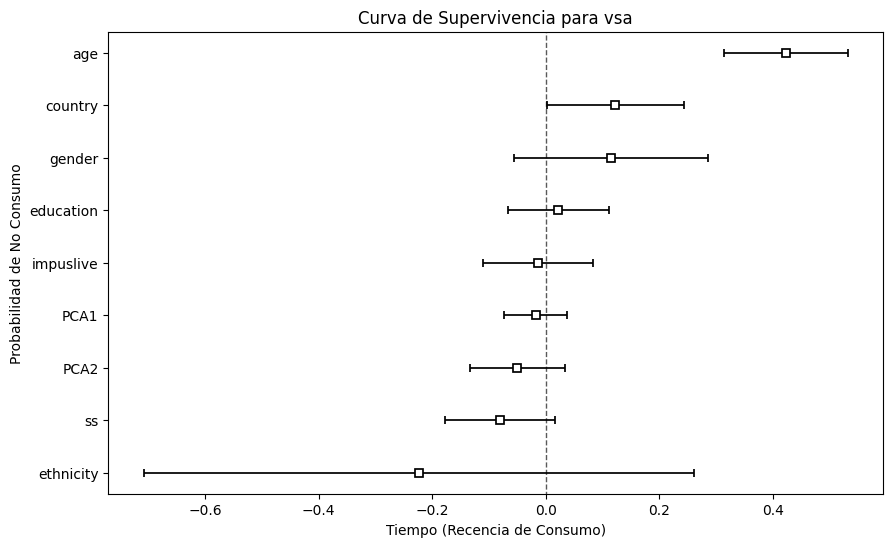

In [ ]:
import matplotlib.pyplot as plt

def generar_curvas_supervivencia(df, droga):
    # Crear la columna de evento para la droga
    df['event_column'] = (df[droga] > 0).astype(int)
    
    # Prepara el DataFrame con los componentes principales de PCA y las características
    df_droga_pca = df[["age", "gender", "education", "country", "ethnicity", 
                       "impuslive", "ss", 'PCA1', 'PCA2', droga, "event_column"]]
    
    # Ajustar el modelo de Cox
    cph = CoxPHFitter(penalizer=0.1)  # Usa la penalización Lasso si lo deseas
    cph.fit(df_droga_pca, duration_col=droga, event_col='event_column', show_progress=True)

    # Generar y graficar la curva de supervivencia
    plt.figure(figsize=(10, 6))
    cph.plot()
    plt.title(f"Curva de Supervivencia para {droga}")
    plt.xlabel("Tiempo (Recencia de Consumo)")
    plt.ylabel("Probabilidad de No Consumo")
    plt.show()

# Iterar sobre todas las drogas y generar las curvas de supervivencia
for droga in y.columns:
    generar_curvas_supervivencia(df, droga)